# Author Details:
- Name: Adam Smulczyk
- Email: adam.smulczyk@gmail.com
- Profile: [Github](https://github.com/AdamSmulczyk)
- [Github Repository](https://github.com/AdamSmulczyk/ML_Project_001)

<a id="1.2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#962E2A;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Table of Contents ℹ️</div>

<a id="toc"></a>
- [I. PLANNING](#I)
    - [I.1 Introduction](#I.1)
    - [I.2 Dataset Description](#I.2)
    - [I.3 Project assumptions](#I.3)
        - [I.3.1 Defining the problem](#I.3.1)
        - [I.3.2 Assessing the scope](#I.3.2)
        - [I.3.3 Success metric](#I.3.3)
        - [I.3.4 Feasibility  of the ML application](#I.3.4)
- [II.DATA COLLECTION AND PREPARATION](#II)
    - [II.1 Import libraries and data files](#II.1)
    - [II.2 Exploratory Data Analysis (EDA)](#II.2)
        - [II.2.1 Reading Data & Target Class Distribution](#II.2.1)
        - [II.2.2 Statistical Summary](#II.2.2)
        - [II.2.3 Correlation Matrics](#II.2.3)
        - [II.2.4 Correlation Matrix - Balanced data](#II.2.4)
        - [II.2.5 Finding any relations or trends considering multiple features](#II.2.5)
            - [II.2.5.1  Distribution of numerical features](#II.2.5.1)
            - [II.2.5.2 Transaction time](#II.2.5.2)
            - [II.2.5.3 'Class' distribution – 'Normal' vs. 'Fraud'](#II.2.5.3)
            - [II.2.5.4  Dependency diagram 'Survived' – 'Sex'](#II.2.5.4)
            - [II.2.5.5 Dependency diagram 'Survived' – 'Sex' for not correlated value](#II.2.5.5)
- [III DATA PRE-PROCESSING (data cleaning)](#III)           
    - [III.1 Convert Types (Downcasting)](#III.1)
    - [III.2 Skewness of distributions](#III.2)
    - [III.3 Detect Outlier](#III.3)
- [IV DATA PROCESSING](#IV)
    - [IV.1 TSN](#IV.1)
    - [IV.2 PCA](#IV.2)
    - [IV.3 Imbalanced target - oversampling by SMOTE](#IV.3)
- [V MODEL ENGINEERING](#V)
    - [V.1 Functional API model - Autoencoder](#V.1)
        - [V.1.1 Model 11](#V.1.1)
    - [V.2 Sequencial API Model](#V.2)  
    - [V.3 Classificators](#V.3)
        - [V.3.1 RandomForestClassifier](#V.3.1)
        - [V.3.2 XGBoostClassifier](#V.3.2)
        - [V.3.3 LGBMClassifier](#V.3.3)        
    - [V.4 SMOTE Classifierss](#V.4)   
        - [V.4.1 RandomForestClassifier - SMOTE](#V.4.1)
- [VI CONCLUSION](#VI)       

<a id="I"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#962E2A;
            overflow:hidden;
            font-weight:700">I <span style='color:#CDA63A'>|</span>PLANNING 👨‍🏫</div>

 ### <a id="I.1"></a><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.1 Introduction</p>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Card fraud involves fraud using payment cards, e.g. downloading a transaction from a rental company in Italy when you were there a few months ago or buying or transferring a certain amount without your authorization.

In the report of the National Bank of Poland on the functioning of the Polish payment system in the first half of 2019, we find information that banks operating in the country recorded over 94.4 thousand frauds using payment cards from January to June last year (2019).

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have **<mark style="background-color:#E3867D;color:white;border-radius:5px;opacity:1.0">492 frauds out of 284,807 transactions</mark>**.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group  of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

 ### <a id="I.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.2 Dataset Description</p>

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
* Features <code>V1, V2, … V28</code> are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
* Feature <code>'Time'</code> contains the seconds elapsed between each transaction and the first transaction in the dataset. 
* Feature <code>'Amount'</code> is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
* Feature <code>'Class'</code> is the response variable and it takes value 1 in case of fraud and 0 otherwise.

 ### <a id="I.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3 Project assumptions 🎯</p>

 ### <a id="I.3.1"></a><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.1 Defining the problem</p>

This project will be implemented based on a real dataset, provided by the project organizer. The goal is to use this dataset and machine learning to create a predictive model that estimates credit card fraud detection.

 ### <a id="I.3.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.2 Assessing the scope</p>

The entire project was done in Python, using Jupyter. Defining the scope of the project, its purpose and priorities determines the type of approach to it.
In this case, the main goal is to achieve a predictive model result that exceeds the satisfaction value achieved by the organizer.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807.
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

 ### <a id="I.3.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.3 Success metric</p>

Given the class imbalance ratio, we recommend measuring the accuracy using the **<mark style="background-color:#E3867D;color:white;border-radius:5px;opacity:1.0">Area Under the Precision-Recall Curve (AUPRC) - ROC (Receiver Operating Characteristics)</mark>**. Confusion matrix accuracy is not meaningful for unbalanced classification.

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability.

* When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.
* When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.
* When AUC is approximately 0, the model is predicting a negative class as a positive class and vice versa.

 ### <a id="I.3.4"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">I.3.4 Feasibility  of the ML application</p>

The feasibility of the project plan should be assessed to decide whether you are able to build a reliable predictive model with such a small sample of data. Or, can we get new data?

Feature engineering will be used for this purpose to obtain a more complete set of predictive attributes. An additional aspect that will affect the assessment of the project feasibility is the provided test data set, which will be used to verify the quality of the obtained predictive model.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="II"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#962E2A;
            overflow:hidden;
            font-weight:700">II <span style='color:#CDA63A'>|</span>DATA COLLECTION AND PREPARATION 👨‍💻</div>

 ### <a id="II.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.1 Import libraries and data files💾</p>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import metrics
import warnings

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# CONFIGURATIONS
# ------------------------------------------------------
%matplotlib inline
pd.set_option('float_format', '{:.3f}'.format)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

background_color = '#f0f0f0'
background_color2 = '#FFFFFF'
sns.set_style("whitegrid", {"axes.facecolor": background_color2})

In [2]:
train = pd.read_csv('creditcard.csv')

 ### <a id="II.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2 Exploratory Data Analysis (EDA)📊</p>

In [29]:
# df is created only to explore data for EDA 
df= train.copy()

 ### <a id="II.2.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.1 Reading Data & Target Class Distribution 📚</p>

In [5]:
df.head()

Time     V1     V2    V3     V4     V5     V6     V7     V8     V9    V10  \
0 0.000 -1.360 -0.073 2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091   
1 0.000  1.192  0.266 0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167   
2 1.000 -1.358 -1.340 1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208   
3 1.000 -0.966 -0.185 1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055   
4 2.000 -1.158  0.878 1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -0.552 -0.618 -0.991 -0.311  1.468 -0.470  0.208  0.026  0.404  0.251   
1  1.613  1.065  0.489 -0.144  0.636  0.464 -0.115 -0.183 -0.146 -0.069   
2  0.625  0.066  0.717 -0.166  2.346 -2.890  1.110 -0.121 -2.262  0.525   
3 -0.226  0.178  0.508 -0.288 -0.631 -1.060 -0.684  1.966 -1.233 -0.208   
4 -0.823  0.538  1.346 -1.120  0.175 -0.451 -0.237 -0.038  0.803  0.409   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021 149.620      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015   2.690      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060 378.660      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061 123.500      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215  69.990      0

In [6]:
df['Class'].unique()

array([0, 1], dtype=int64)

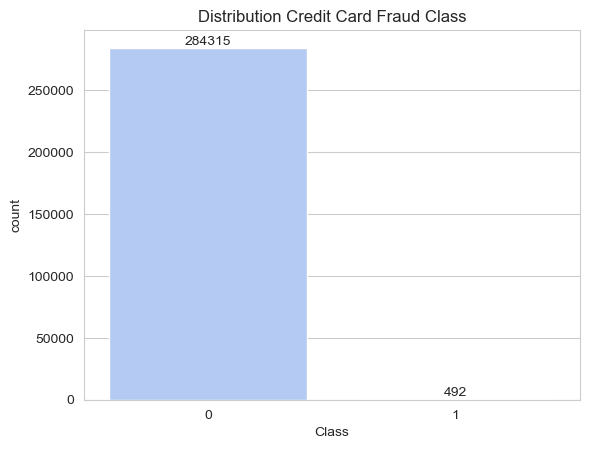

In [6]:
chart = sns.countplot(x='Class',
              data=train,
              palette='coolwarm')
plt.title('Distribution Credit Card Fraud Class')
chart.bar_label(chart.containers[0])
plt.show()

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.
</ul>
</div>

 ### <a id="II.2.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.2 Statistical Summary 🔢</p>

In [11]:
def statistical_summary_numerical(df: pd.DataFrame):
    df = df.select_dtypes(include='number')
    desc = pd.DataFrame(index=df.columns.to_list())
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc = pd.concat([desc, df.describe().T.drop('count', axis=1)], axis=1)
    desc["skew"] = df.skew()
    desc["kurtosis"] = df.kurtosis()
    desc = desc.round(2)
    return desc

statistical_summary_numerical(df)

type   count  nunique  %unique  null  %null      mean       std  \
Time    float64  284807   124592   43.750     0  0.000 94813.860 47488.150   
V1      float64  284807   275663   96.790     0  0.000     0.000     1.960   
V2      float64  284807   275663   96.790     0  0.000     0.000     1.650   
V3      float64  284807   275663   96.790     0  0.000    -0.000     1.520   
V4      float64  284807   275663   96.790     0  0.000     0.000     1.420   
V5      float64  284807   275663   96.790     0  0.000     0.000     1.380   
V6      float64  284807   275663   96.790     0  0.000     0.000     1.330   
V7      float64  284807   275663   96.790     0  0.000    -0.000     1.240   
V8      float64  284807   275663   96.790     0  0.000     0.000     1.190   
V9      float64  284807   275663   96.790     0  0.000    -0.000     1.100   
V10     float64  284807   275663   96.790     0  0.000     0.000     1.090   
V11     float64  284807   275663   96.790     0  0.000     0.000     1.020   
V12     float64  284807   275663   96.790     0  0.000    -0.000     1.000   
V13     float64  284807   275663   96.790     0  0.000     0.000     1.000   
V14     float64  284807   275663   96.790     0  0.000     0.000     0.960   
V15     float64  284807   275663   96.790     0  0.000     0.000     0.920   
V16     float64  284807   275663   96.790     0  0.000     0.000     0.880   
V17     float64  284807   275663   96.790     0  0.000    -0.000     0.850   
V18     float64  284807   275663   96.790     0  0.000     0.000     0.840   
V19     float64  284807   275663   96.790     0  0.000     0.000     0.810   
V20     float64  284807   275663   96.790     0  0.000     0.000     0.770   
V21     float64  284807   275663   96.790     0  0.000     0.000     0.730   
V22     float64  284807   275663   96.790     0  0.000    -0.000     0.730   
V23     float64  284807   275663   96.790     0  0.000     0.000     0.620   
V24     float64  284807   275663   96.790     0  0.000     0.000     0.610   
V25     float64  284807   275663   96.790     0  0.000     0.000     0.520   
V26     float64  284807   275663   96.790     0  0.000     0.000     0.480   
V27     float64  284807   275663   96.790     0  0.000    -0.000     0.400   
V28     float64  284807   275663   96.790     0  0.000    -0.000     0.330   
Amount  float64  284807    32767   11.500     0  0.000    88.350   250.120   
Class     int64  284807        2    0.000     0  0.000     0.000     0.040   

            min       25%       50%        75%        max   skew  kurtosis  
Time      0.000 54201.500 84692.000 139320.500 172792.000 -0.040    -1.290  
V1      -56.410    -0.920     0.020      1.320      2.450 -3.280    32.490  
V2      -72.720    -0.600     0.070      0.800     22.060 -4.620    95.770  
V3      -48.330    -0.890     0.180      1.030      9.380 -2.240    26.620  
V4       -5.680    -0.850    -0.020      0.740     16.880  0.680     2.640  
V5     -113.740    -0.690    -0.050      0.610     34.800 -2.430   206.900  
V6      -26.160    -0.770    -0.270      0.400     73.300  1.830    42.640  
V7      -43.560    -0.550     0.040      0.570    120.590  2.550   405.610  
V8      -73.220    -0.210     0.020      0.330     20.010 -8.520   220.590  
V9      -13.430    -0.640    -0.050      0.600     15.590  0.550     3.730  
V10     -24.590    -0.540    -0.090      0.450     23.750  1.190    31.990  
V11      -4.800    -0.760    -0.030      0.740     12.020  0.360     1.630  
V12     -18.680    -0.410     0.140      0.620      7.850 -2.280    20.240  
V13      -5.790    -0.650    -0.010      0.660      7.130  0.070     0.200  
V14     -19.210    -0.430     0.050      0.490     10.530 -2.000    23.880  
V15      -4.500    -0.580     0.050      0.650      8.880 -0.310     0.280  
V16     -14.130    -0.470     0.070      0.520     17.320 -1.100    10.420  
V17     -25.160    -0.480    -0.070      0.400      9.250 -3.840    94.800  
V18      -9.500    -0.500    -0.000      0.500     

In [13]:
print(f'{df.memory_usage().sum()/(1000000)} MB')

70.632268 MB


<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> There is only two attributes which we can analyze 'Time' and 'Amount', because rest of them V1-V28 are generated by PCA and they look very similar.
<li> Looking to the 'Time' attribute, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).
<li> There is no missing values.
<li> Quite high memory usage data file.
</ul>
</div>

 ### <a id="II.2.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.3 Correlation Matrics🎛️</p>

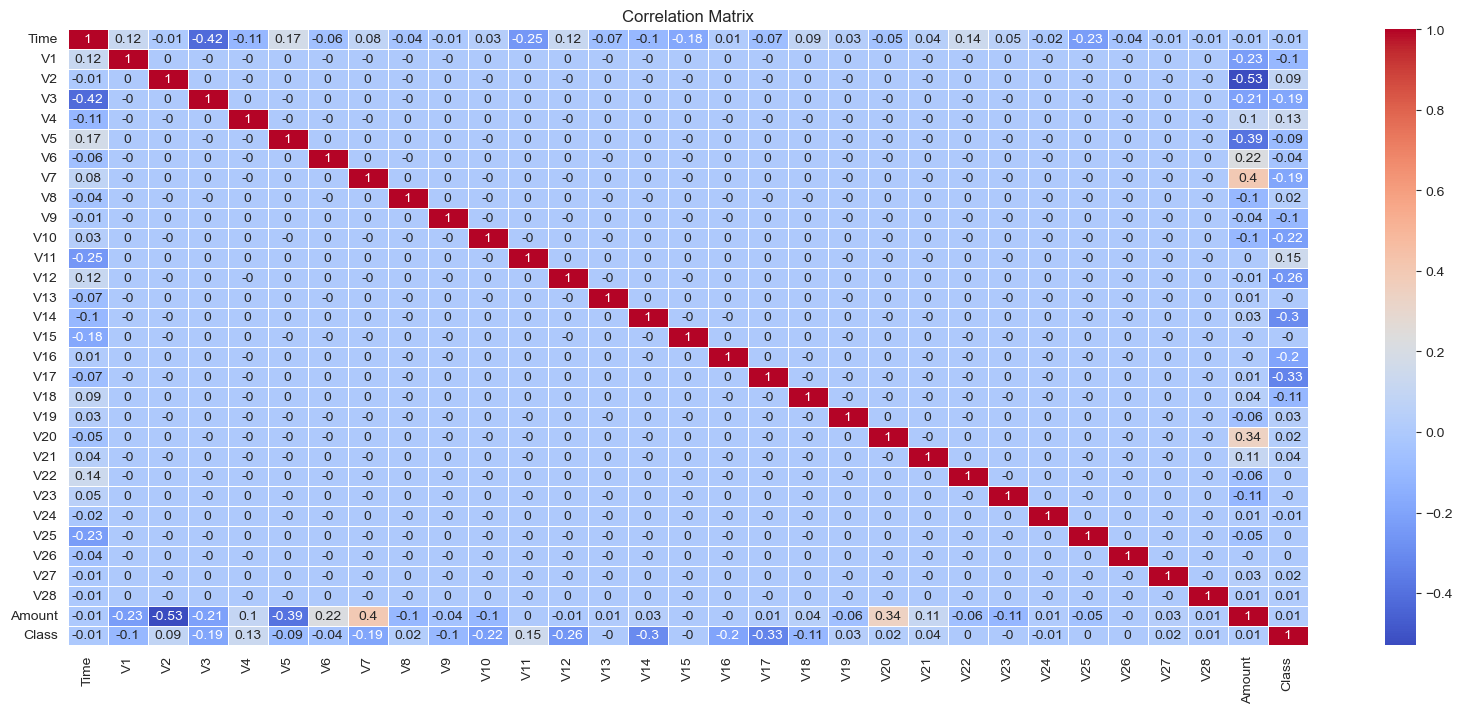

In [7]:
corr = df.corr()
plt.figure(figsize=(20,8))
fig = sns.heatmap(corr.round(2), cmap='coolwarm', linewidths=.5, annot=True)
fig.set(title="Correlation Matrix");

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).
<li>The highest correlations are for the variables: Amount/V2(-0.53), Time/V3 (-0.42), Amount/V7 (+0.40)
</ul>
</div>

### <a id="II.2.4"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.4 Correlation Matrix - Balanced data</p>

In [8]:
df_normal = df[df['Class']==0]
df_fraud = df[df['Class']==1]

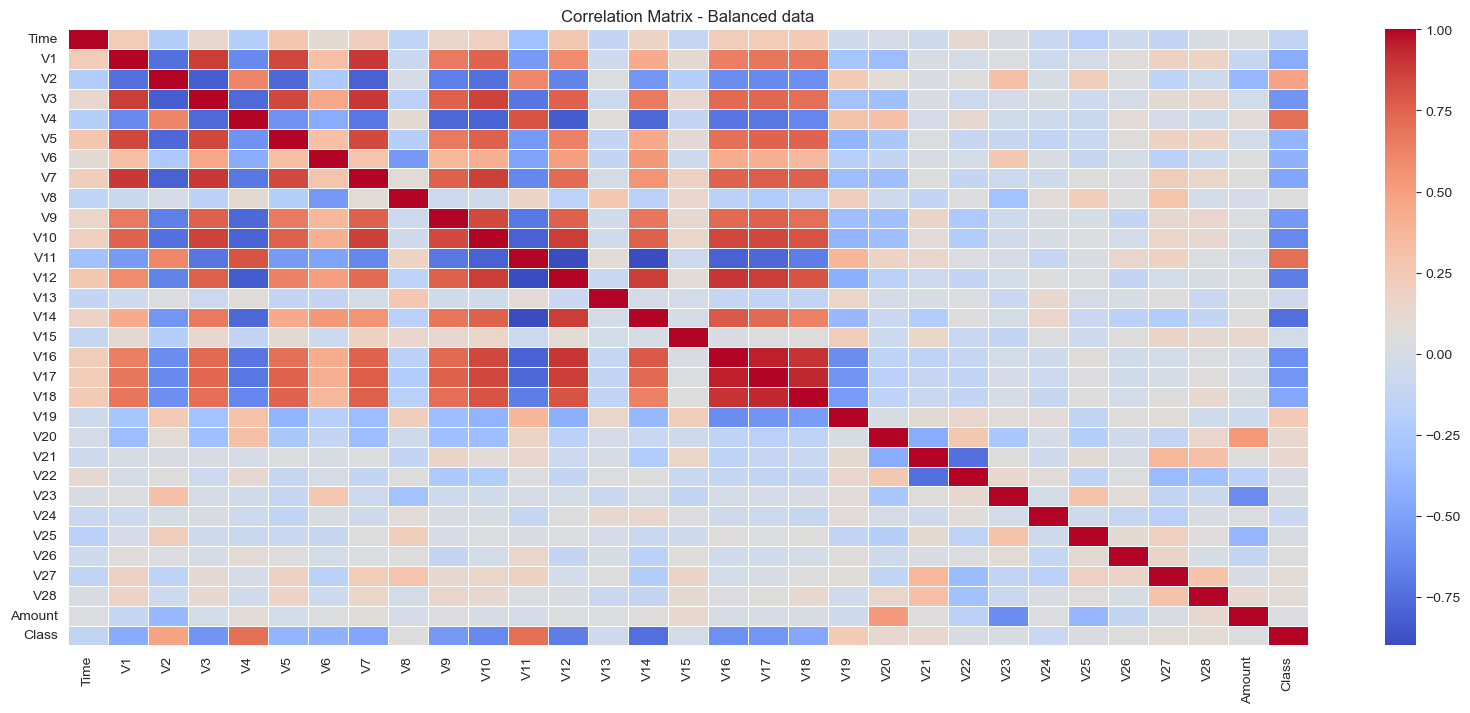

In [9]:
df_corrected = pd.concat([df_fraud, df_normal.sample(1*df_fraud.shape[0])])
corr_corrected = df_corrected.corr()
 
plt.figure(figsize=(20,8))
fig = sns.heatmap(corr_corrected.round(2), cmap='coolwarm', linewidths=.5)
fig.set(title="Correlation Matrix - Balanced data");
plt.show()

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> The previous correlation matrix showed that there is no notable correlation between features V1-V28. The reason for this is that the data is strongly unbalanced.
<li> After balancing it looks that thesr is strong correlation between terget class and  V1, V-V7, V9-V12, V14, V16-V18.
</ul>
</div>

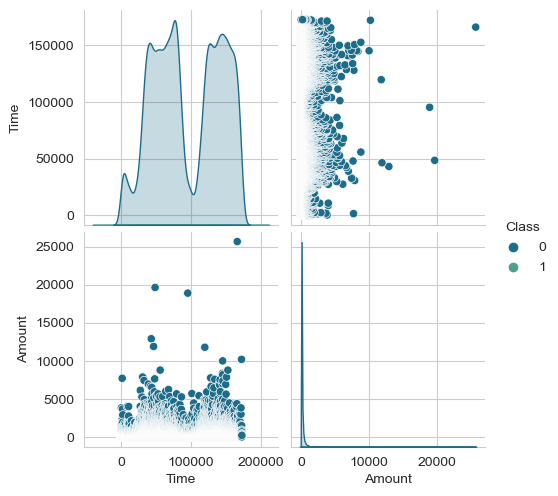

In [53]:
df_2 = df[['Time',  'Amount', 'Class']]

sns.pairplot(df_2, hue='Class', palette='crest_r')

 ### <a id="II.2.5"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5 Finding any relations or trends considering multiple features</p>

#### <a id="II.2.5.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5.1  Distribution of numerical features 📈</p>

<Figure size 640x480 with 0 Axes>

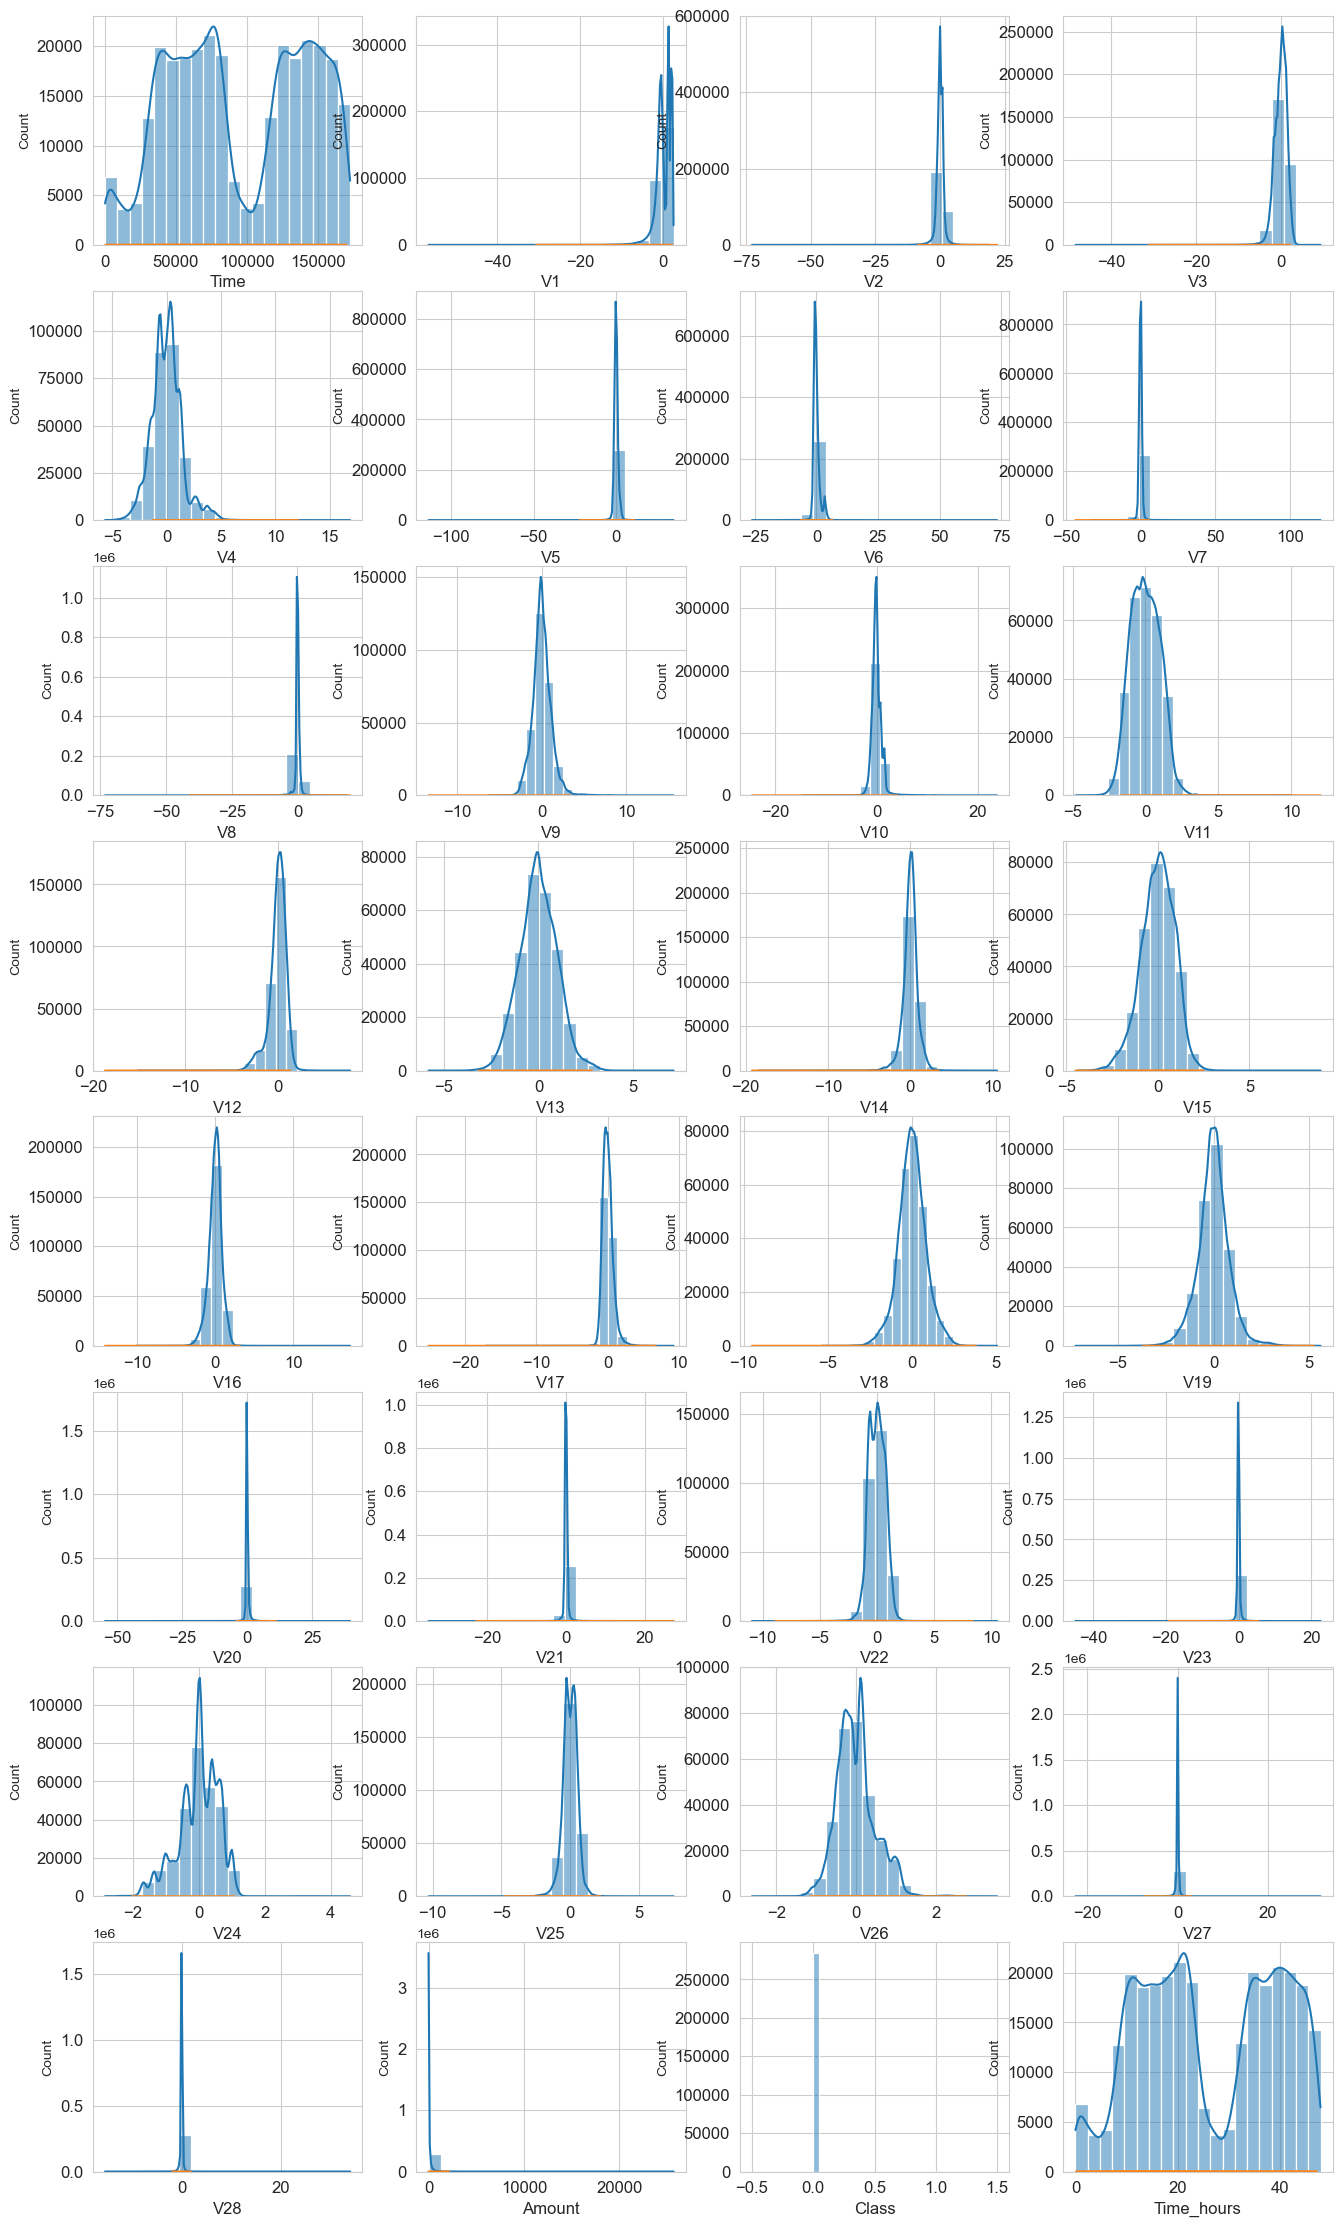

In [36]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.histplot(t0[feature],  label="Class = 0",  kde=True, 
                     bins=20, palette = 'coolwarm')
    sns.histplot(t1[feature], label="Class = 1",  kde=True, 
                     bins=20, palette = 'coolwarm')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

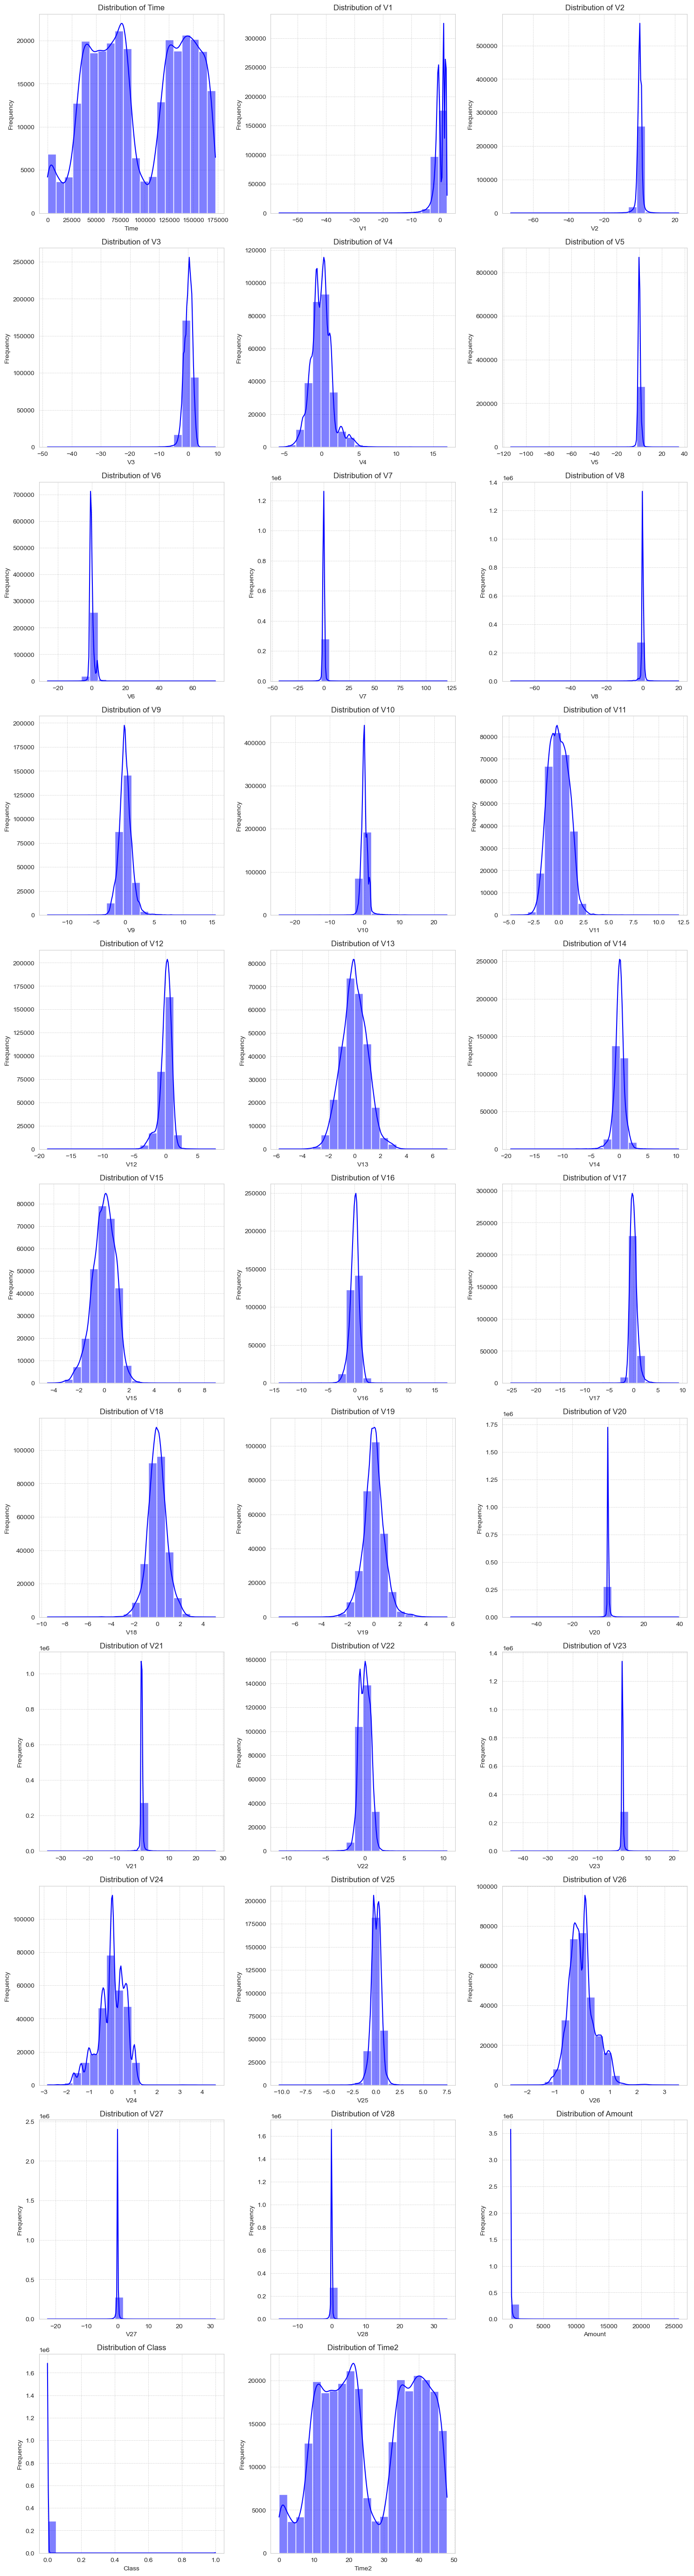

In [55]:
def plot_numeric_distribution(df_train):
    numeric_columns  = df.select_dtypes(include=['number']).columns
    
    background_color = '#ffffff'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 3  # Set number of columns for subplot layout
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    for i, col in enumerate(numeric_columns):
        # Histogram with KDE plot
        p = sns.histplot(df_train[col], bins=20, kde=True, ax=axs[i], color='blue', #edgecolor='black',
                          linewidth=1)
        p.set_title(f"Distribution of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Frequency")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

plot_numeric_distribution(df)

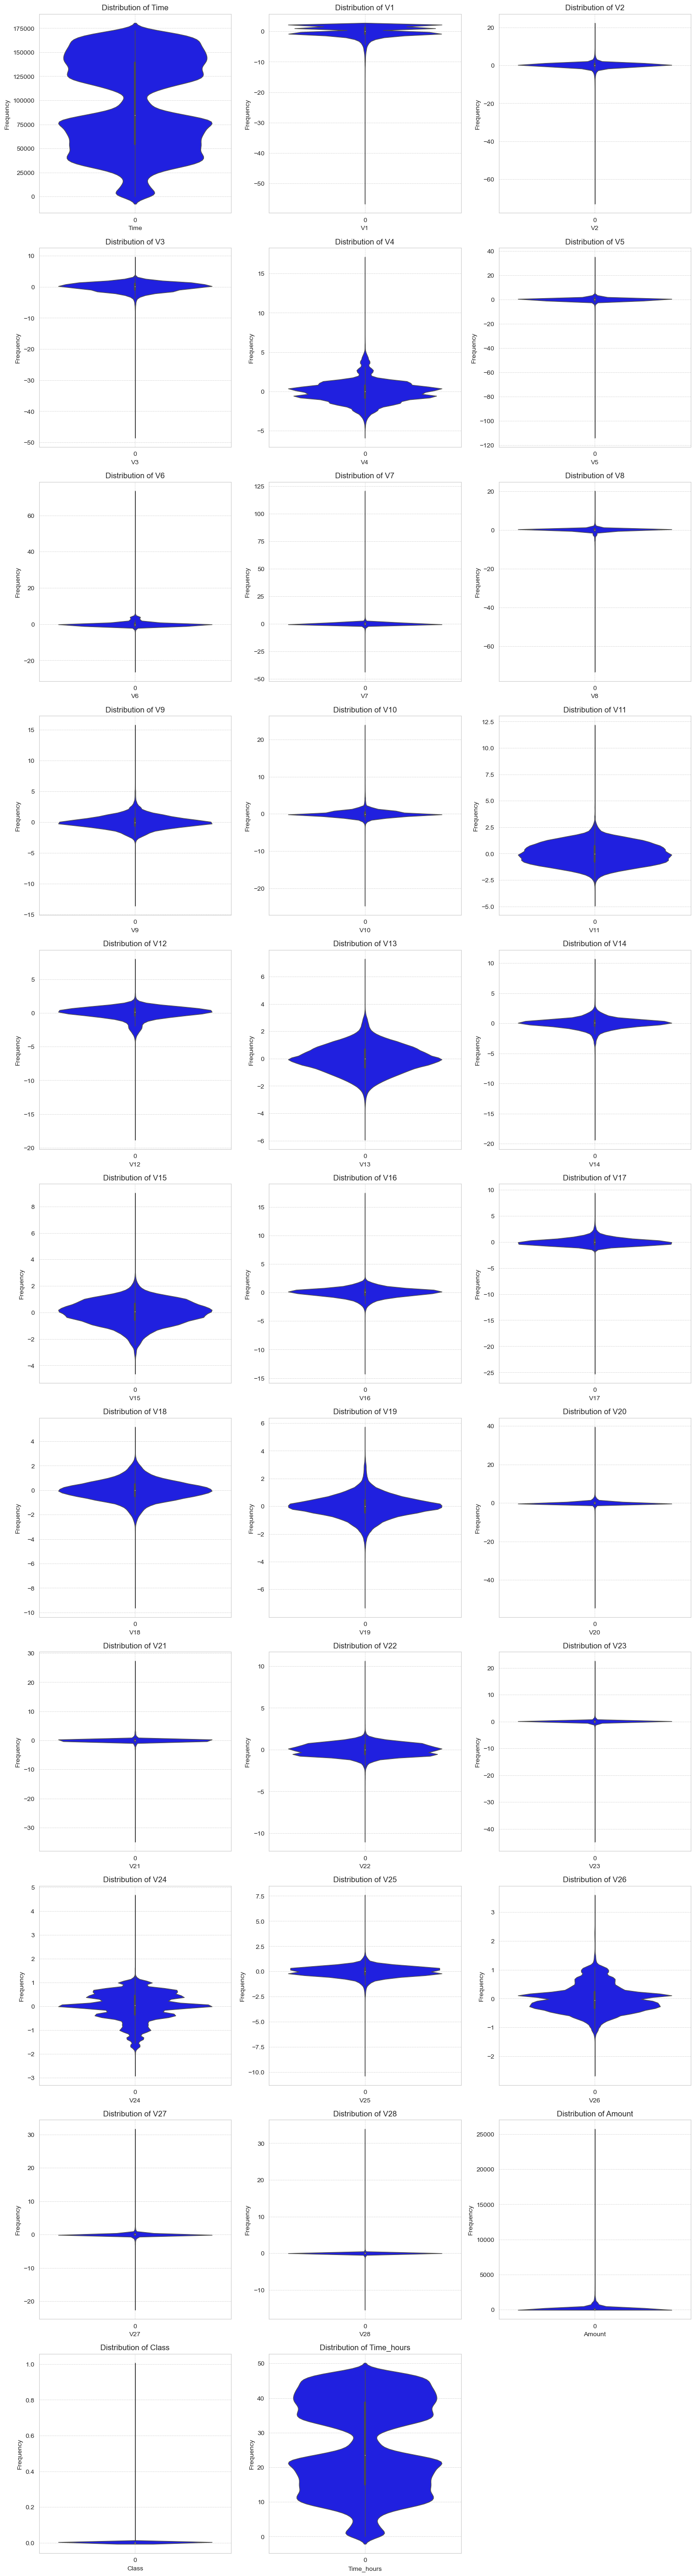

In [40]:
def plot_violinplot_distribution(df_train):
    numeric_columns  = df.select_dtypes(include=['number']).columns
    
    background_color = '#ffffff'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 3  # Set number of columns for subplot layout
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    # Plot each numeric column
    for i, col in enumerate(numeric_columns):
        # Histogram with KDE plot
        p = sns.violinplot(df_train[col],   ax=axs[i], color='blue', #edgecolor='black',
                          linewidth=1)
        p.set_title(f"Distribution of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Frequency")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

plot_violinplot_distribution(df)

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> There are two types of features: those having a normal distribution (e.g. V11, V13, V15) or those clustered at one point (V10, V2, V20).
</ul>
</div>

#### <a id="II.2.5.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5.2  Transaction time</p>

In [14]:
df['Time_hours'] = df['Time'].apply(lambda x : x / 3600)

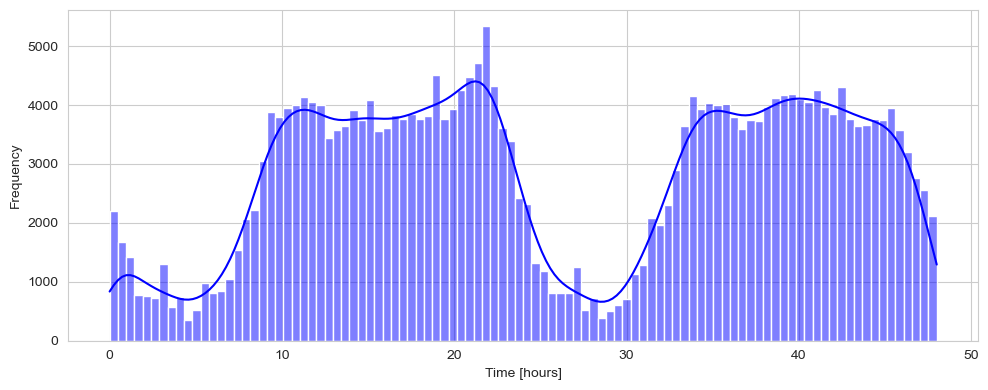

In [21]:
plt.figure(figsize=(10, 4))
p =sns.histplot(df['Time_hours'], bins=100, kde=True,  color='blue', linewidth=1)
p.set_xlabel("Time [hours]")
p.set_ylabel("Frequency")

    
plt.tight_layout()
plt.show()

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> 'Time' attribute, time is given in seconds.  Transactions took place over two consecutive days (or 172792 seconds).
<li> There is a decrease in transactions over time between 1 and 8 a.m. and between 12 p.m. and 3 p.m. These are probably night hours, when card transactions are performed much less frequently.
</ul>
</div>

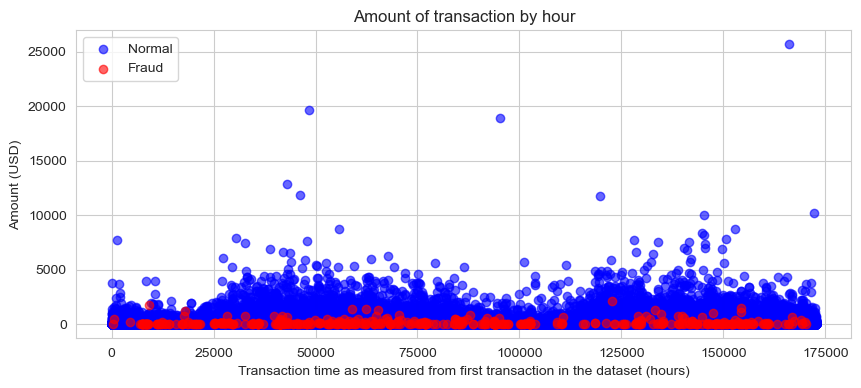

In [22]:
plt.figure(figsize=(10, 4))
plt.scatter((df_normal['Time']), df_normal['Amount'], alpha=0.6, 
            label='Normal', color='blue')
plt.scatter((df_fraud['Time']), df_fraud['Amount'], alpha=0.6, 
            label='Fraud', color='red')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Amount (USD)")
plt.legend(loc='upper left')
plt.show()

#### <a id="II.2.5.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5.3 'Class' distribution  – 'Normal' vs. 'Fraud'</p>

In [42]:
def hist_norm_fraud(normal, fraud, bins=50, title='Title', 
                    xlabel='xlabel', ylabel='ylabel'):
    plt.figure(figsize=(14, 6))
    plt.hist((normal), bins, alpha=0.6, density=True, 
             label='Normal', color='blue')
    plt.hist((fraud), bins, alpha=0.6, density=True, 
             label='Fraud', color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right', frameon=False)
    plt.show()

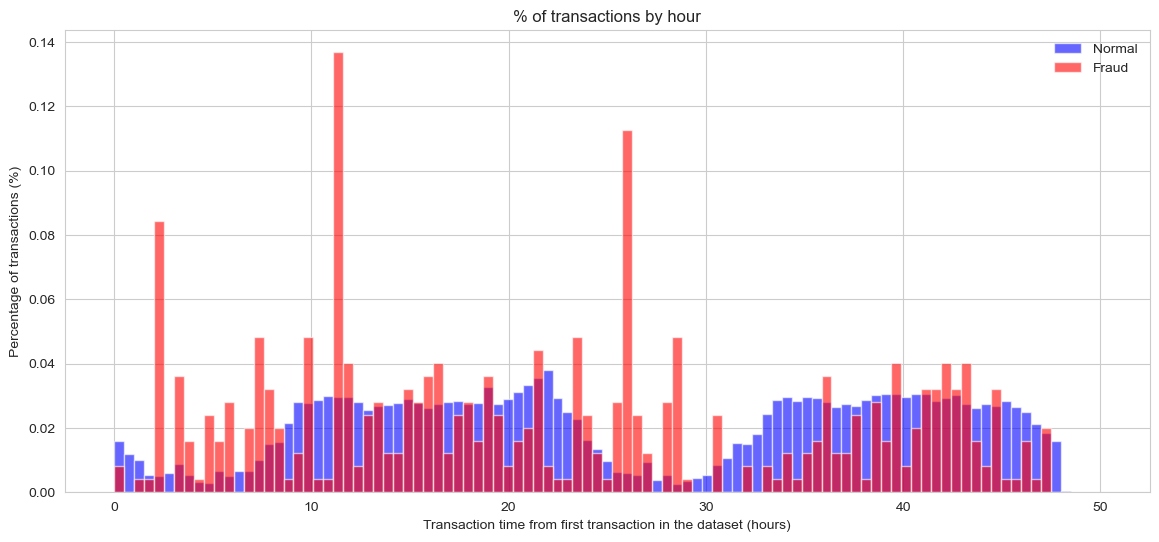

In [110]:
hist_norm_fraud(df_normal['Time_hours'], df_fraud['Time_hours'],
                 bins=np.linspace(0, 50, 100),
                title="% of transactions by hour",
                xlabel="Transaction time from first transaction in the dataset (hours)",
                ylabel="Percentage of transactions (%)")

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night.

</ul>
</div>

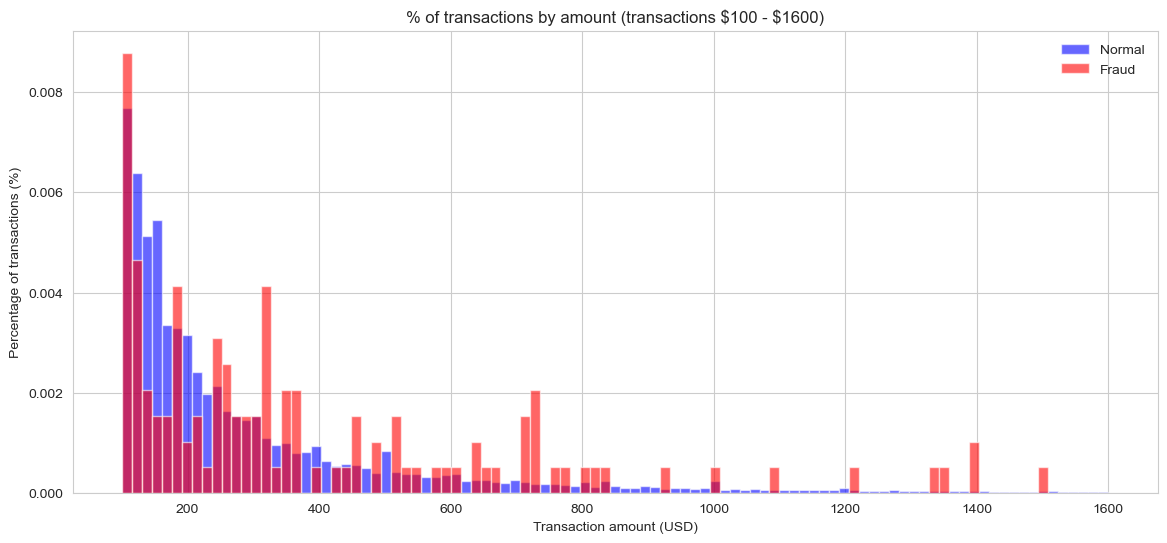

In [88]:
hist_norm_fraud(df_normal['Amount'], df_fraud['Amount'],
                bins=np.linspace(100, 1600, 100),
                title="% of transactions by amount (transactions \$100 - $1600)",
                xlabel="Transaction amount (USD)",
                ylabel="Percentage of transactions (%)")

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> Most of the transactions involved small amounts.
<li> There is a decrease in transactions over time between 1 and 8 a.m. and between 12 p.m. and 3 p.m. These are probably night hours, when card transactions are performed much less frequently.
</ul>
</div>

#### <a id="II.2.5.4"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5.4  Dependency diagram 'Survived' – 'Sex' for correlated value </p>

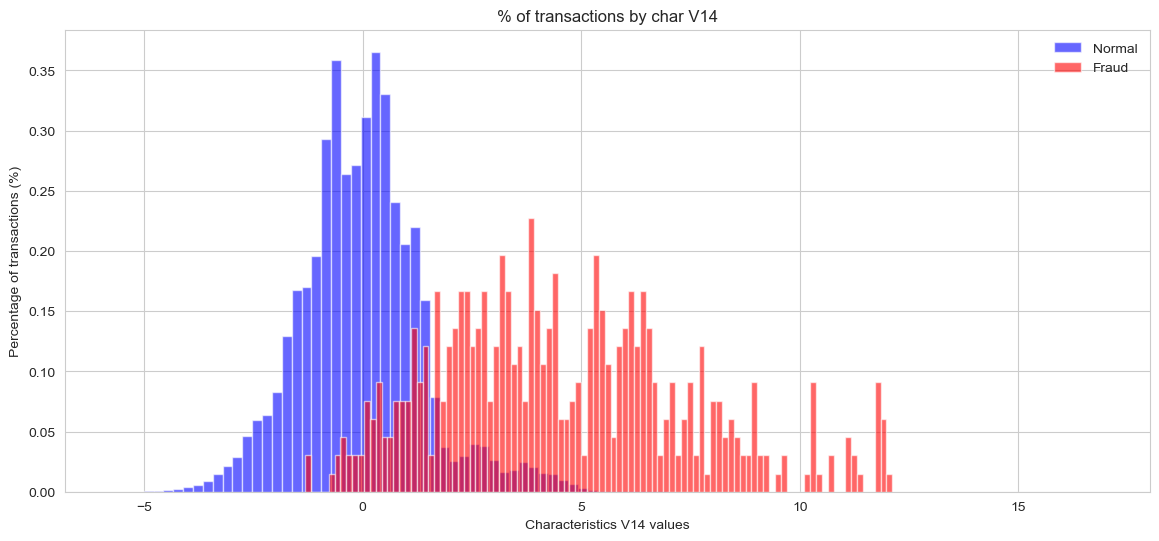

In [25]:
hist_norm_fraud(df_normal['V4'], df_fraud['V4'],
                bins=100,
                title="% of transactions by char V14",
                xlabel="Characteristics V14 values",
                ylabel="Percentage of transactions (%)")

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li>  In this case, the distinction between data sets is very easy and clear.
</ul>
</div>

#### <a id="II.2.5.5"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">II.2.5.5  Dependency diagram 'Survived' – 'Sex' for  not correlated value </p>

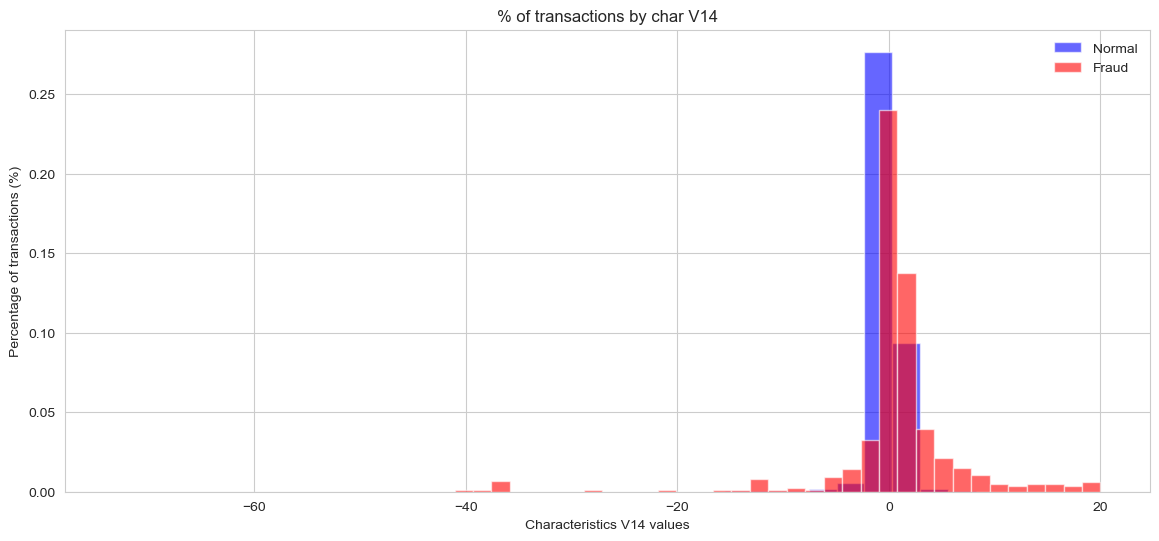

In [31]:
hist_norm_fraud(df_normal['V8'], df_fraud['V8'],
                bins=35,
                title="% of transactions by char V14",
                xlabel="Characteristics V14 values",
                ylabel="Percentage of transactions (%)")

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusions:
<li> In this case it is difficult to designate separate data sets.
</ul>
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="III"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#962E2A;
            overflow:hidden;
            font-weight:700">III <span style='color:#CDA63A'>|</span>DATA PRE-PROCESSING 🧪</div>

In [101]:
X = train.drop(columns=['Class']).copy()
y = train['Class']

 ### <a id="III.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.1 Convert Types (Downcasting)</p>

In [102]:
# Aggregate Categorical and Numerical
numerical_int = X.select_dtypes(include=['int64'])
numerical_float = X.select_dtypes(include=['float64'])

def convert_types (df):
    for i in numerical_int:
         df[i] = df[i].astype('int32')  
    for i in numerical_float:
         df[i] = df[i].astype('float32') 
    return df

X = convert_types(X)

 ### <a id="III.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.2 Skewness of distributions 📉</p>

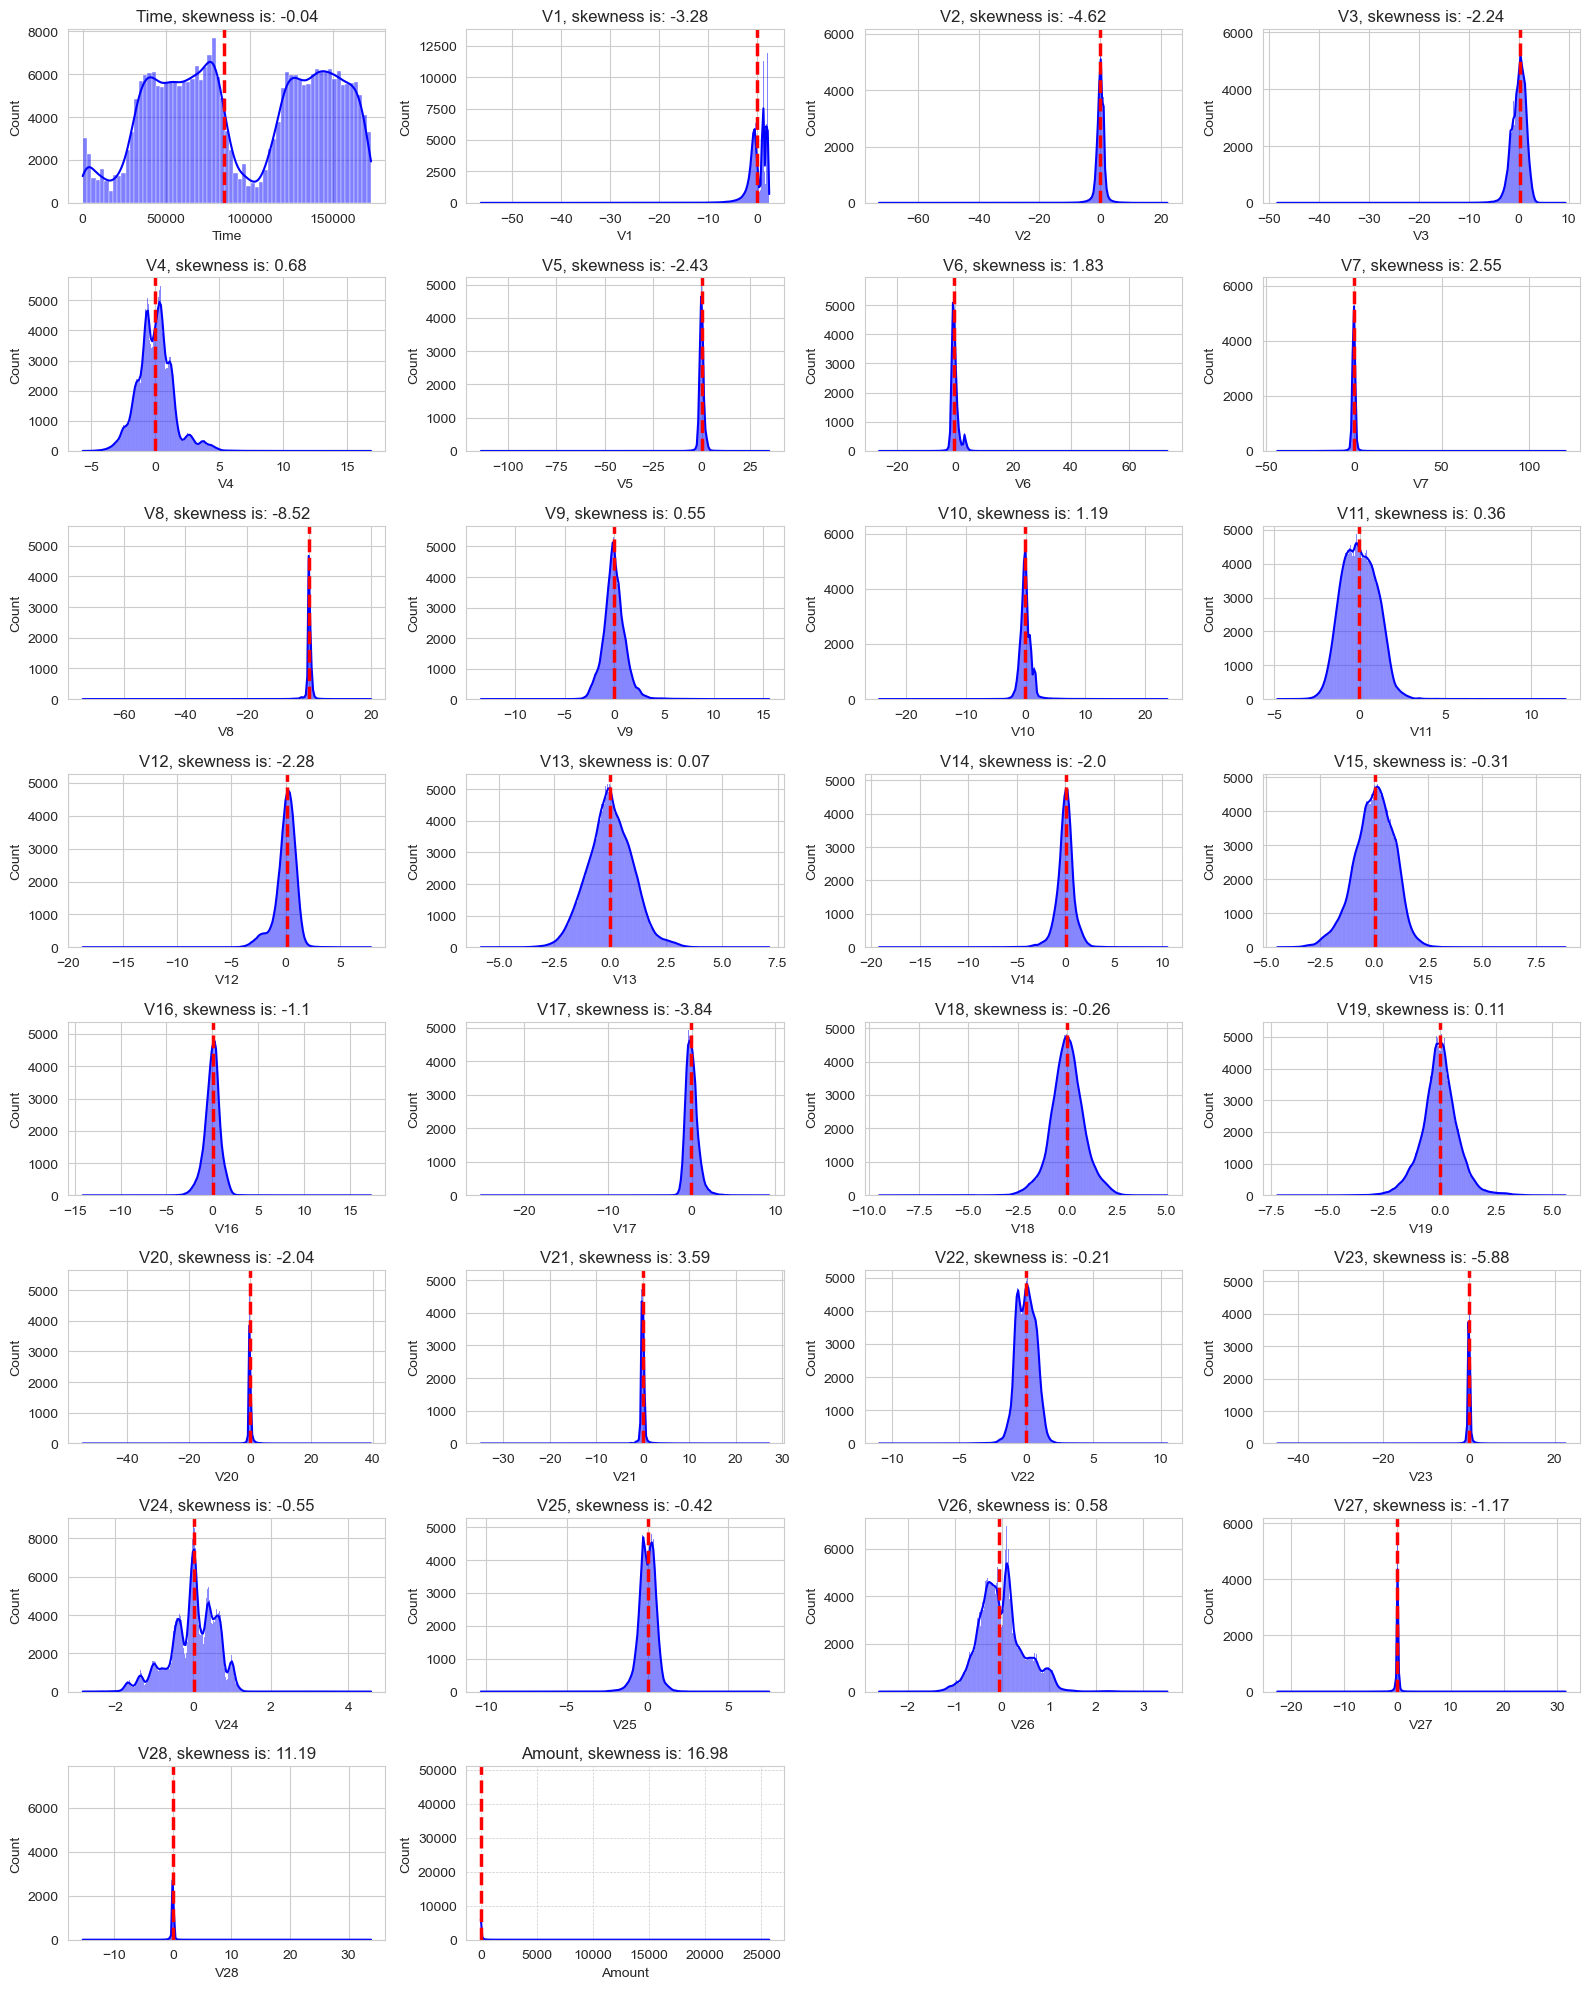

In [23]:
features = X.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(16, 20))
for i, col in enumerate(features):
    plt.subplot(8, 4, i+1) 
    sns.histplot(data=X, x=col,
                 kde=True,
                 color= 'blue'
                 )
    plt.title(col +', skewness is: '+str(round(X[col].skew(axis = 0, skipna = True),2)))
    plt.axvline(x=X[col].median(),
            color='red',
            ls='--', 
            lw=2.5,
            )
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

 ### <a id="III.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">III.3 Detect Outliers 🧐</p>

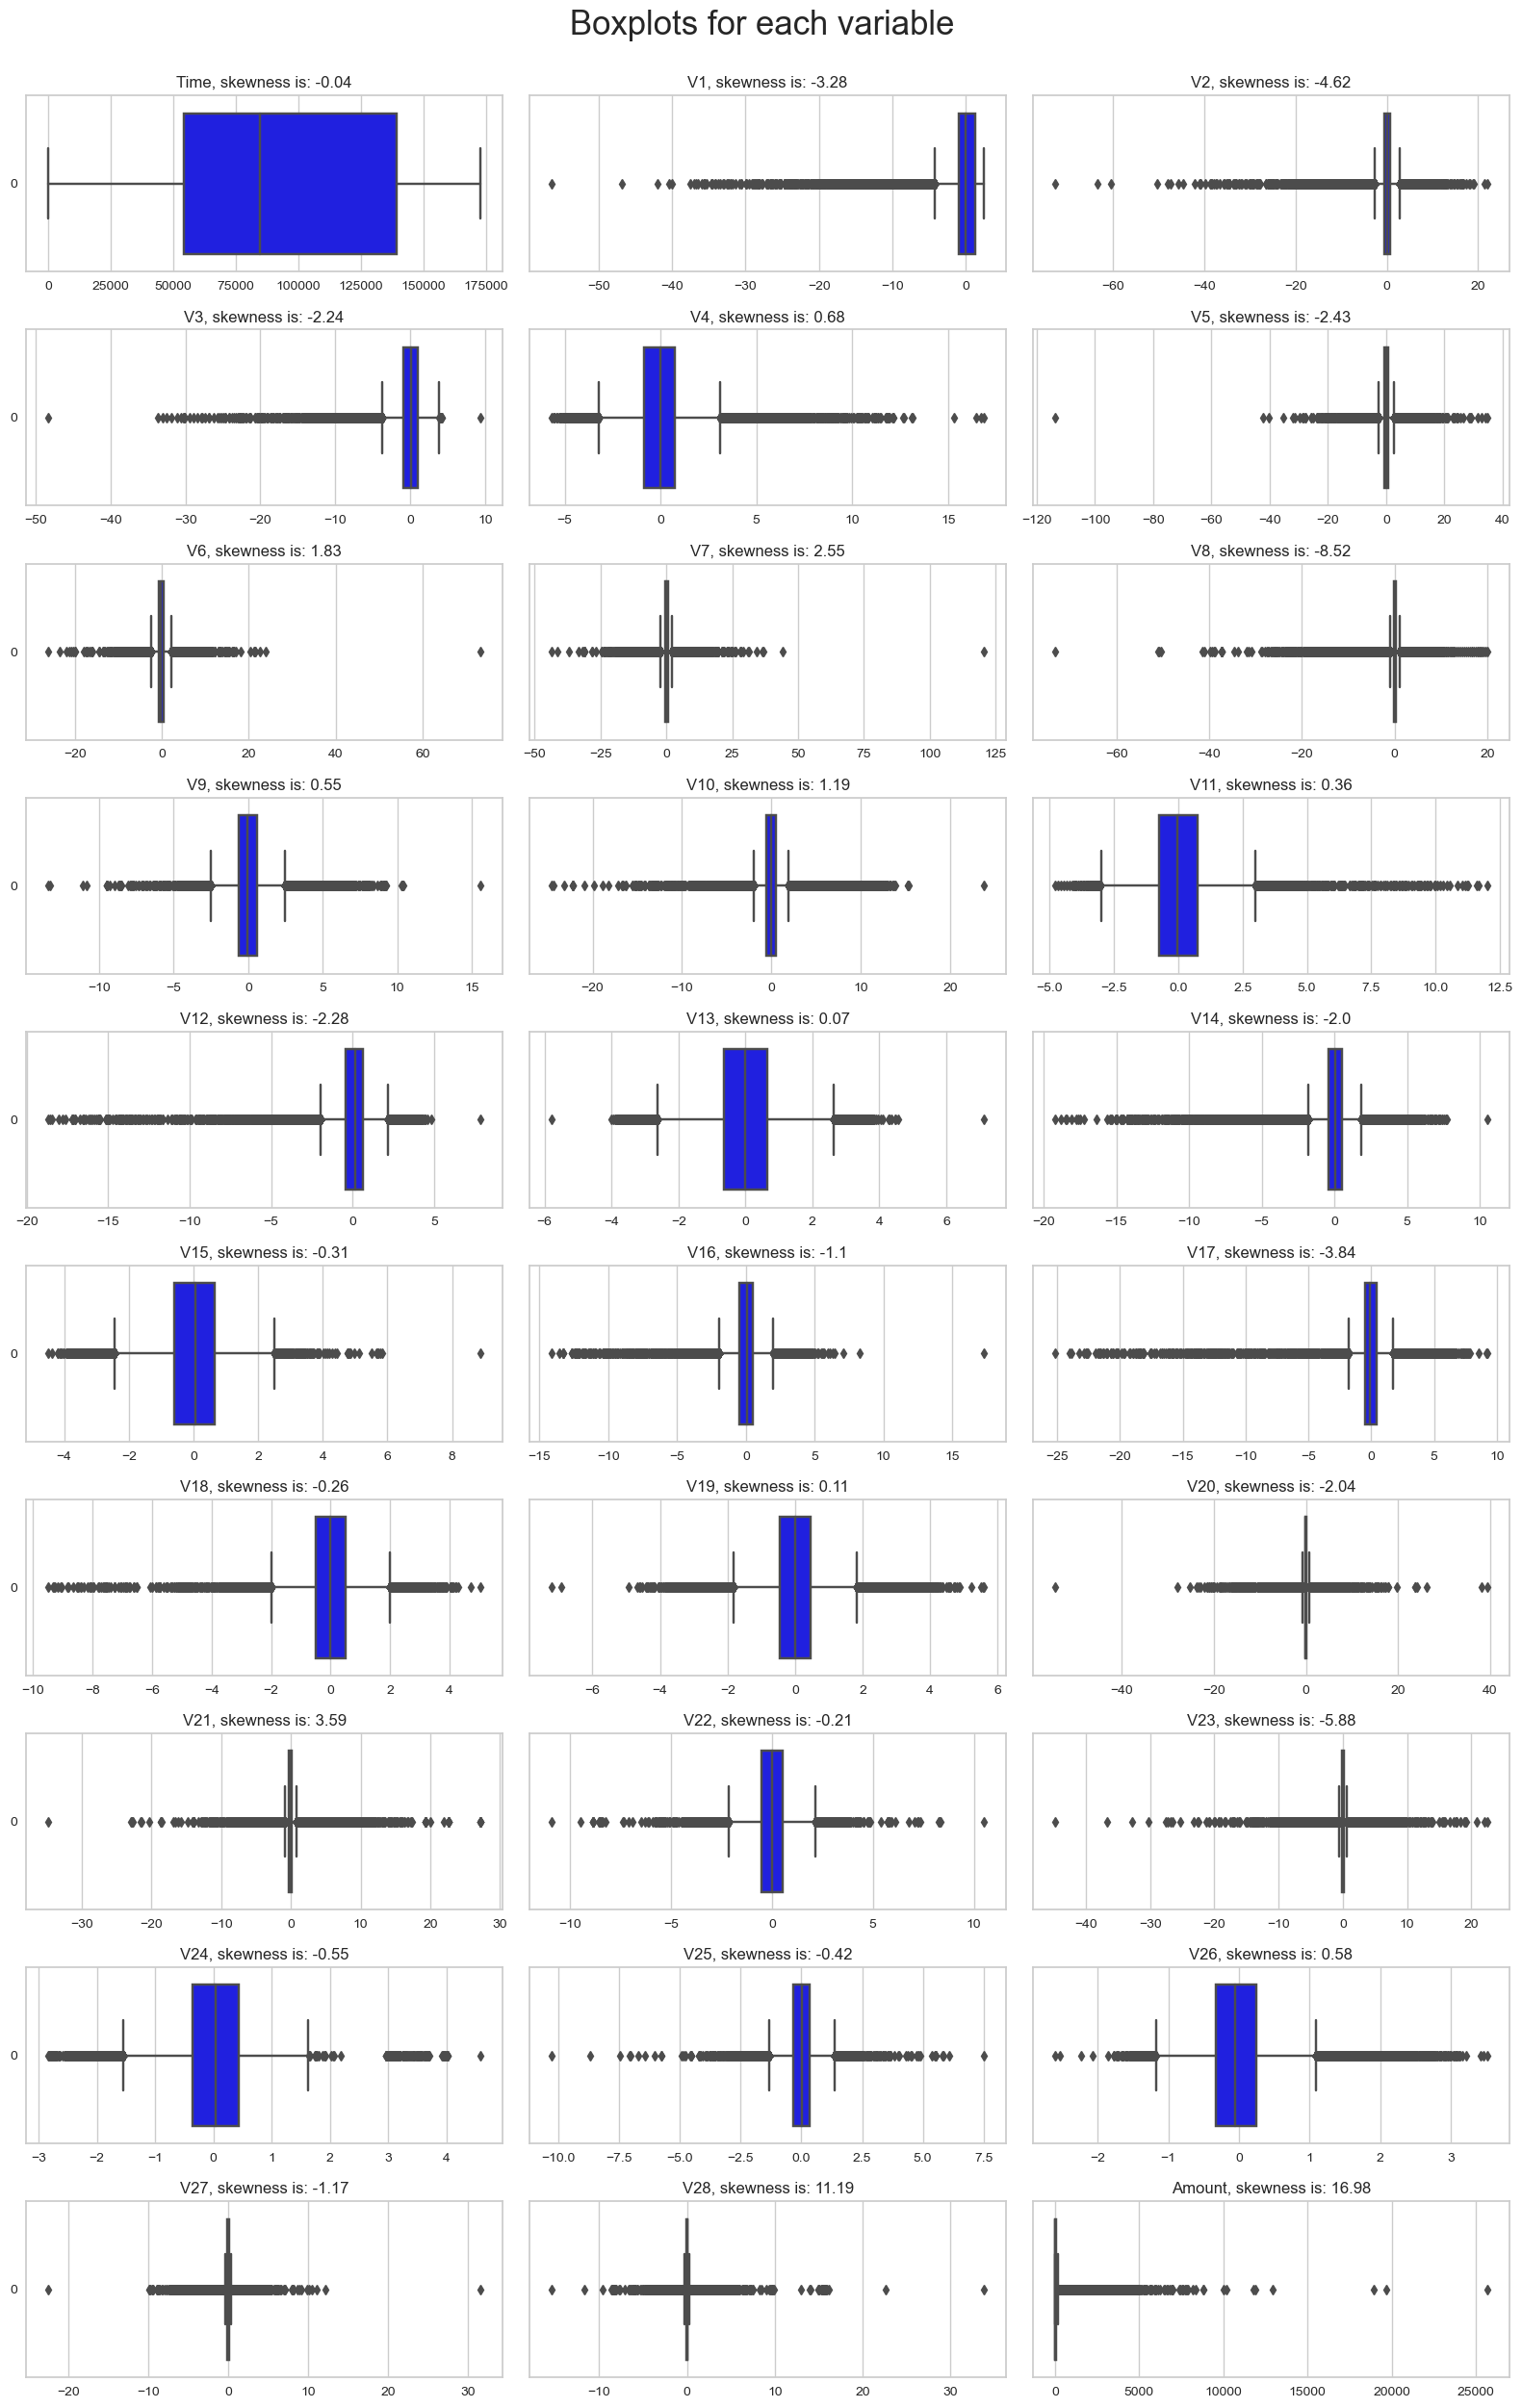

In [103]:
# checking boxplots
numeric_columns = X.select_dtypes(include=['number']).columns

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], color='blue')
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=X, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [104]:
def calculate_outliers_percentage(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")


calculate_outliers_percentage(X)

Percentage of outliers in Time: 0.00%
Percentage of outliers in V1: 2.48%
Percentage of outliers in V2: 4.75%
Percentage of outliers in V3: 1.18%
Percentage of outliers in V4: 3.91%
Percentage of outliers in V5: 4.32%
Percentage of outliers in V6: 8.06%
Percentage of outliers in V7: 3.14%
Percentage of outliers in V8: 8.47%
Percentage of outliers in V9: 2.91%
Percentage of outliers in V10: 3.33%
Percentage of outliers in V11: 0.27%
Percentage of outliers in V12: 5.39%
Percentage of outliers in V13: 1.18%
Percentage of outliers in V14: 4.97%
Percentage of outliers in V15: 1.02%
Percentage of outliers in V16: 2.87%
Percentage of outliers in V17: 2.61%
Percentage of outliers in V18: 2.64%
Percentage of outliers in V19: 3.58%
Percentage of outliers in V20: 9.75%
Percentage of outliers in V21: 5.09%
Percentage of outliers in V22: 0.46%
Percentage of outliers in V23: 6.51%
Percentage of outliers in V24: 1.68%
Percentage of outliers in V25: 1.88%
Percentage of outliers in V26: 1.96%
Percentag

In [105]:
def handle_outliers(df):

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    #clip: everything smaller than lower_bound = lower_bound / everything grater than upper_bound = upper_bound
    return df

X = handle_outliers(X)

In [106]:
calculate_outliers_percentage(X)

Percentage of outliers in Time: 0.00%
Percentage of outliers in V1: 0.00%
Percentage of outliers in V2: 0.00%
Percentage of outliers in V3: 0.00%
Percentage of outliers in V4: 0.00%
Percentage of outliers in V5: 0.00%
Percentage of outliers in V6: 0.00%
Percentage of outliers in V7: 0.00%
Percentage of outliers in V8: 0.00%
Percentage of outliers in V9: 0.00%
Percentage of outliers in V10: 0.00%
Percentage of outliers in V11: 0.00%
Percentage of outliers in V12: 0.00%
Percentage of outliers in V13: 0.00%
Percentage of outliers in V14: 0.00%
Percentage of outliers in V15: 0.00%
Percentage of outliers in V16: 0.00%
Percentage of outliers in V17: 0.00%
Percentage of outliers in V18: 0.00%
Percentage of outliers in V19: 0.00%
Percentage of outliers in V20: 0.00%
Percentage of outliers in V21: 0.00%
Percentage of outliers in V22: 0.00%
Percentage of outliers in V23: 0.00%
Percentage of outliers in V24: 0.00%
Percentage of outliers in V25: 0.00%
Percentage of outliers in V26: 0.00%
Percentag

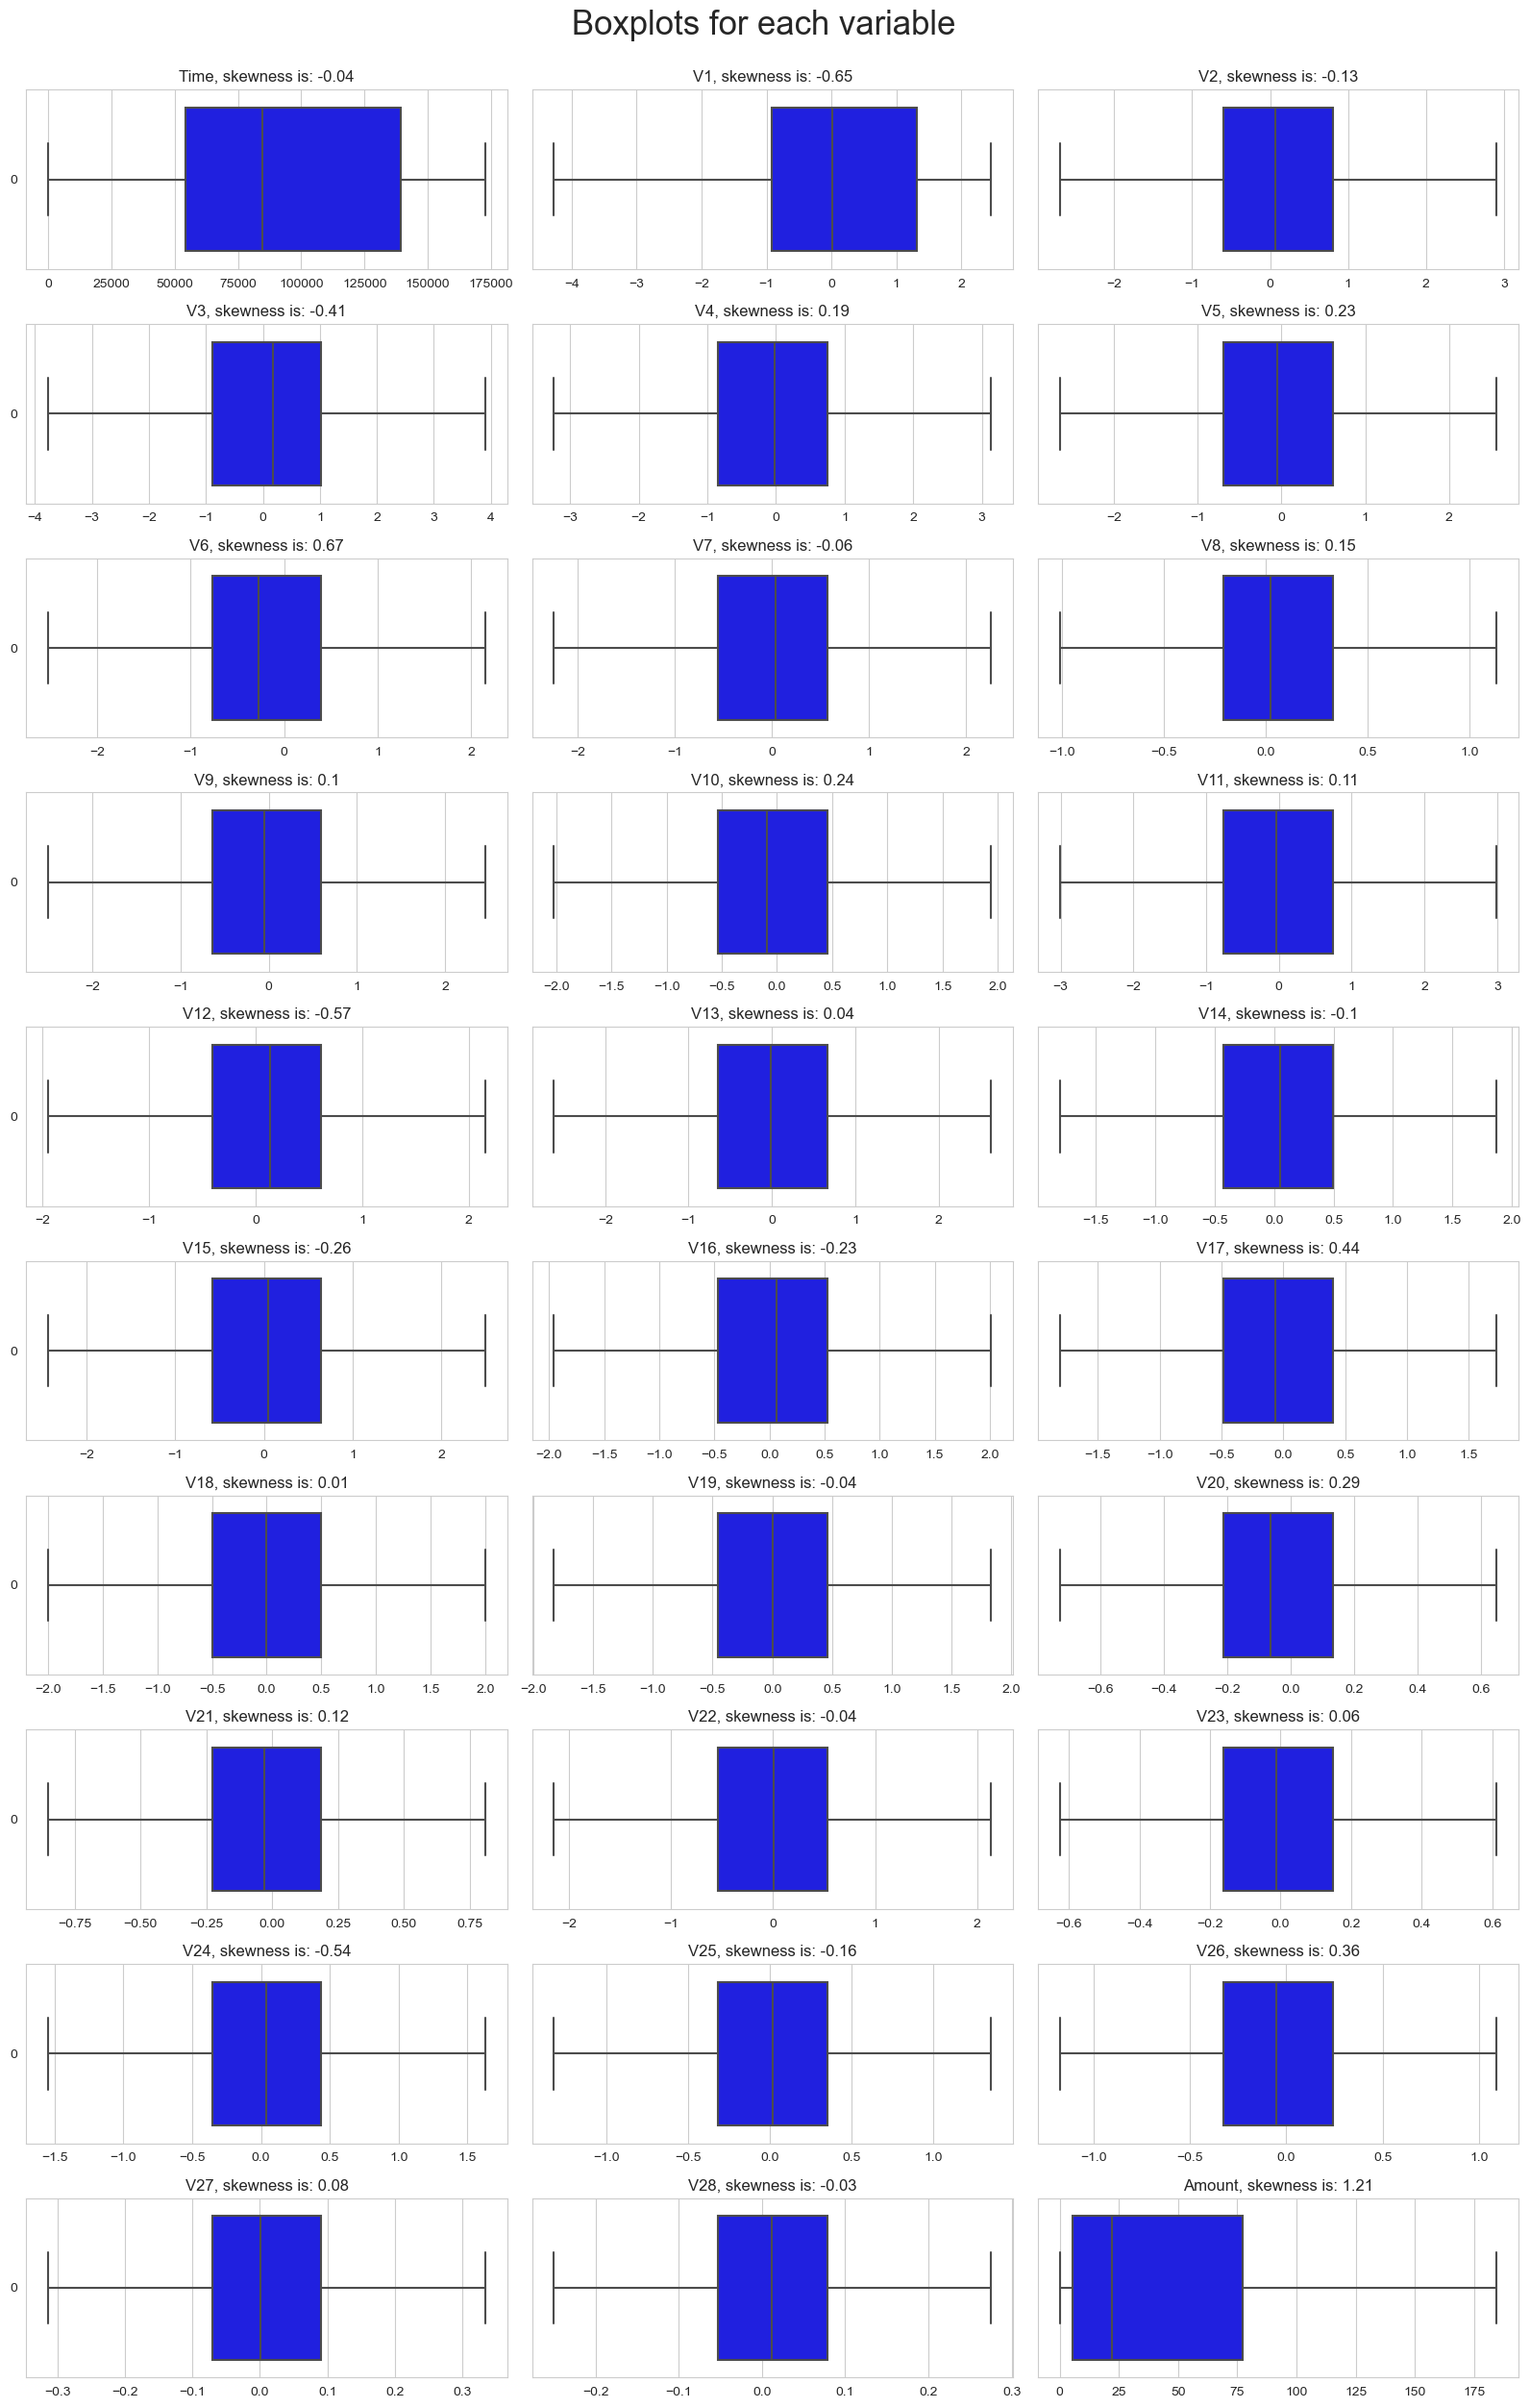

In [20]:
boxplots_custom(dataset=X, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="IV"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#962E2A;
            overflow:hidden;
            font-weight:700">IV <span style='color:#CDA63A'>|</span>DATA PROCESSING 🛠️</div>

In [71]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder 
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.metrics import cohen_kappa_score, accuracy_score, adjusted_mutual_info_score, mean_absolute_error, r2_score, mean_squared_error
from collections import Counter

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier

from sklearn.feature_selection import SelectFromModel, RFECV, SelectKBest, chi2, f_classif,f_regression, SelectFromModel, RFE, mutual_info_classif, SelectPercentile
from sklearn.linear_model import Lasso
from boruta import BorutaPy
from sklearn.decomposition import PCA

 ### <a id="IV.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.1 TSN</p>

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, y, "original.png")

 ### <a id="IV.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.2 PCA</p>

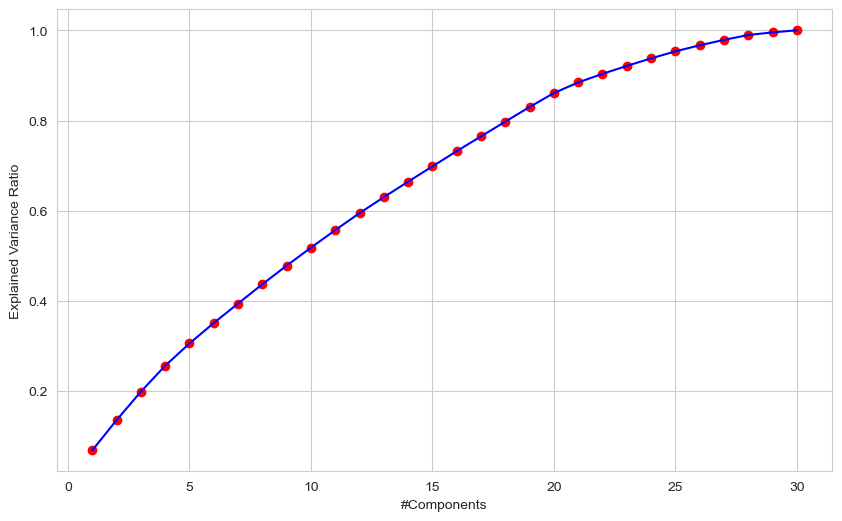

In [14]:
pca = PCA()

pca_pipe = make_pipeline(StandardScaler(), pca)

pca_pipe.fit(X)
explained_variance_ratio = np.cumsum(pca_pipe[-1].explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)+1), explained_variance_ratio, "b-")
plt.scatter(range(1, len(X.columns)+1), explained_variance_ratio, c="red")
plt.xlabel("#Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Principal Component Analysis or PCA is a linear dimensionality reduction algorithm. In this technique, data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.
<li> We can preserve 99% of variance with 28 components if we use PCA.
</ul>
</div>

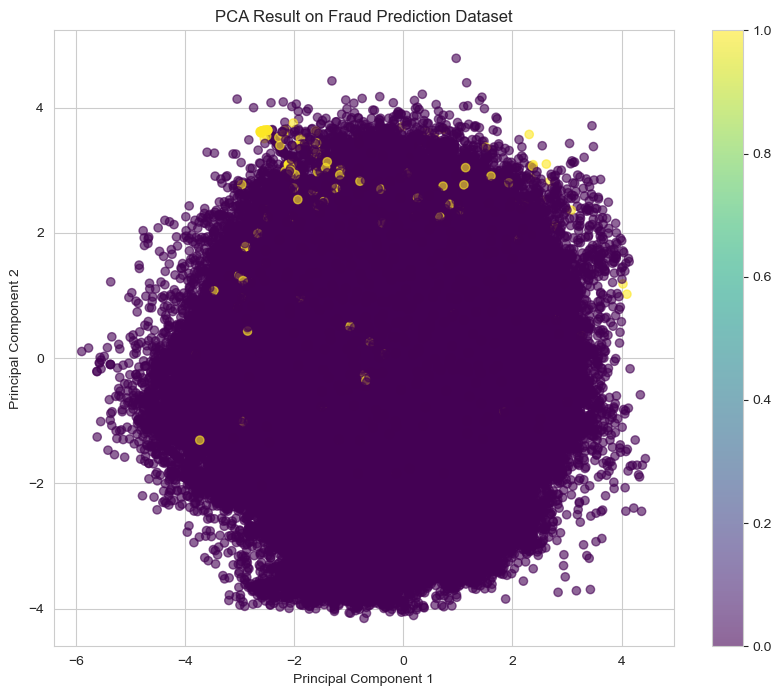

In [21]:
# Preparing the data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the features

# Applying PCA
pca = PCA(n_components=2)  # Reduce to two dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df.reset_index(drop=True, inplace=True)  # Reset the index of pca_df

train_df_reset = train.reset_index(drop=True)  # Reset the index of train_df
pca_df['Class'] = train_df_reset['Class']  # Add the target variable for coloring

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=pca_df['Principal Component 1'], y=pca_df['Principal Component 2'],
                      c=pca_df['Class'], cmap='viridis', alpha=0.6)
plt.title('PCA Result on Fraud Prediction Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
This visualization helps in understanding the overall data structure and the interplay of features relative to flood probability, but it also highlights the need for possibly more sophisticated modeling techniques to capture the relationships effectively.
<li> The dataset shows a broad spread along both principal component axes, indicating diverse variance captured by these components.
<li> The color gradient representing FloodProbability suggests varying degrees of flood risk across different areas of the plot. However, there isn't a distinct separation or clustering based on flood probability, implying that the relationship between the observed features and flood probability may be complex and not easily separable in the first two principal components.
<li> The gradient from lighter to darker hues, as the flood probability increases, is more dispersed rather than concentrated, suggesting that higher flood probabilities might be influenced by a combination of features not easily captured by simple linear transformations like PCA.
</ul>
</div>

 ### <a id="IV.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.3 Imbalanced target - oversampling by SMOTE</p>

In [9]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [62]:
smote = SMOTE(random_state=2021)
 
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

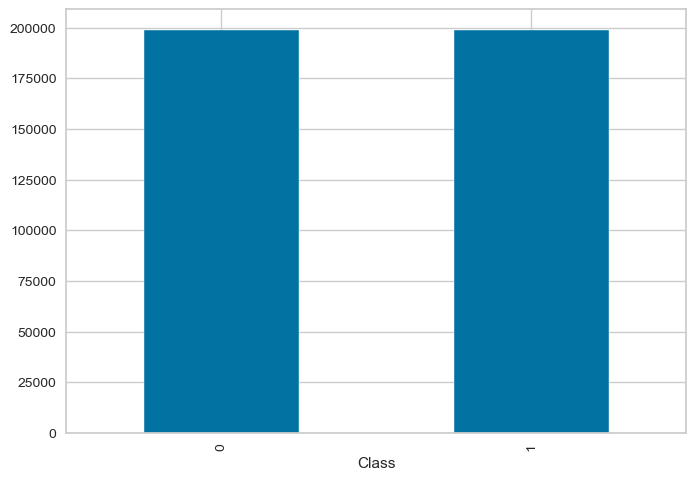

In [63]:
pd.Series(y_train_smote).value_counts().plot.bar();

In [67]:
X_train_smote.shape

(398016, 30)

 ### <a id="IV.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.3 Normalizing</p>

In [175]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### <a id="IV.4"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">IV.4 Feature Selections</p>

In [31]:
discrete_features = X.dtypes == int


def mi_score_maker(X, y, discrete_features):
    scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features': X.columns,
        'Scores': scores
    })
    df = df.sort_values(['Scores'], ascending=False).reset_index(drop=True)
    return df

mi_scores = mi_score_maker(X, y, discrete_features)
mi_scores

Features  Scores
0       V17   0.007
1       V11   0.006
2       V10   0.006
3       V14   0.005
4        V3   0.004
5       V12   0.004
6    Amount   0.004
7       V16   0.004
8        V4   0.004
9        V7   0.004
10       V6   0.003
11       V2   0.003
12       V9   0.003
13      V18   0.003
14      V28   0.003
15      V27   0.002
16      V21   0.002
17       V5   0.002
18       V1   0.002
19     Time   0.002
20      V20   0.002
21       V8   0.002
22      V19   0.001
23      V23   0.001
24      V24   0.001
25      V26   0.001
26      V25   0.001
27      V13   0.000
28      V15   0.000
29      V22   0.000

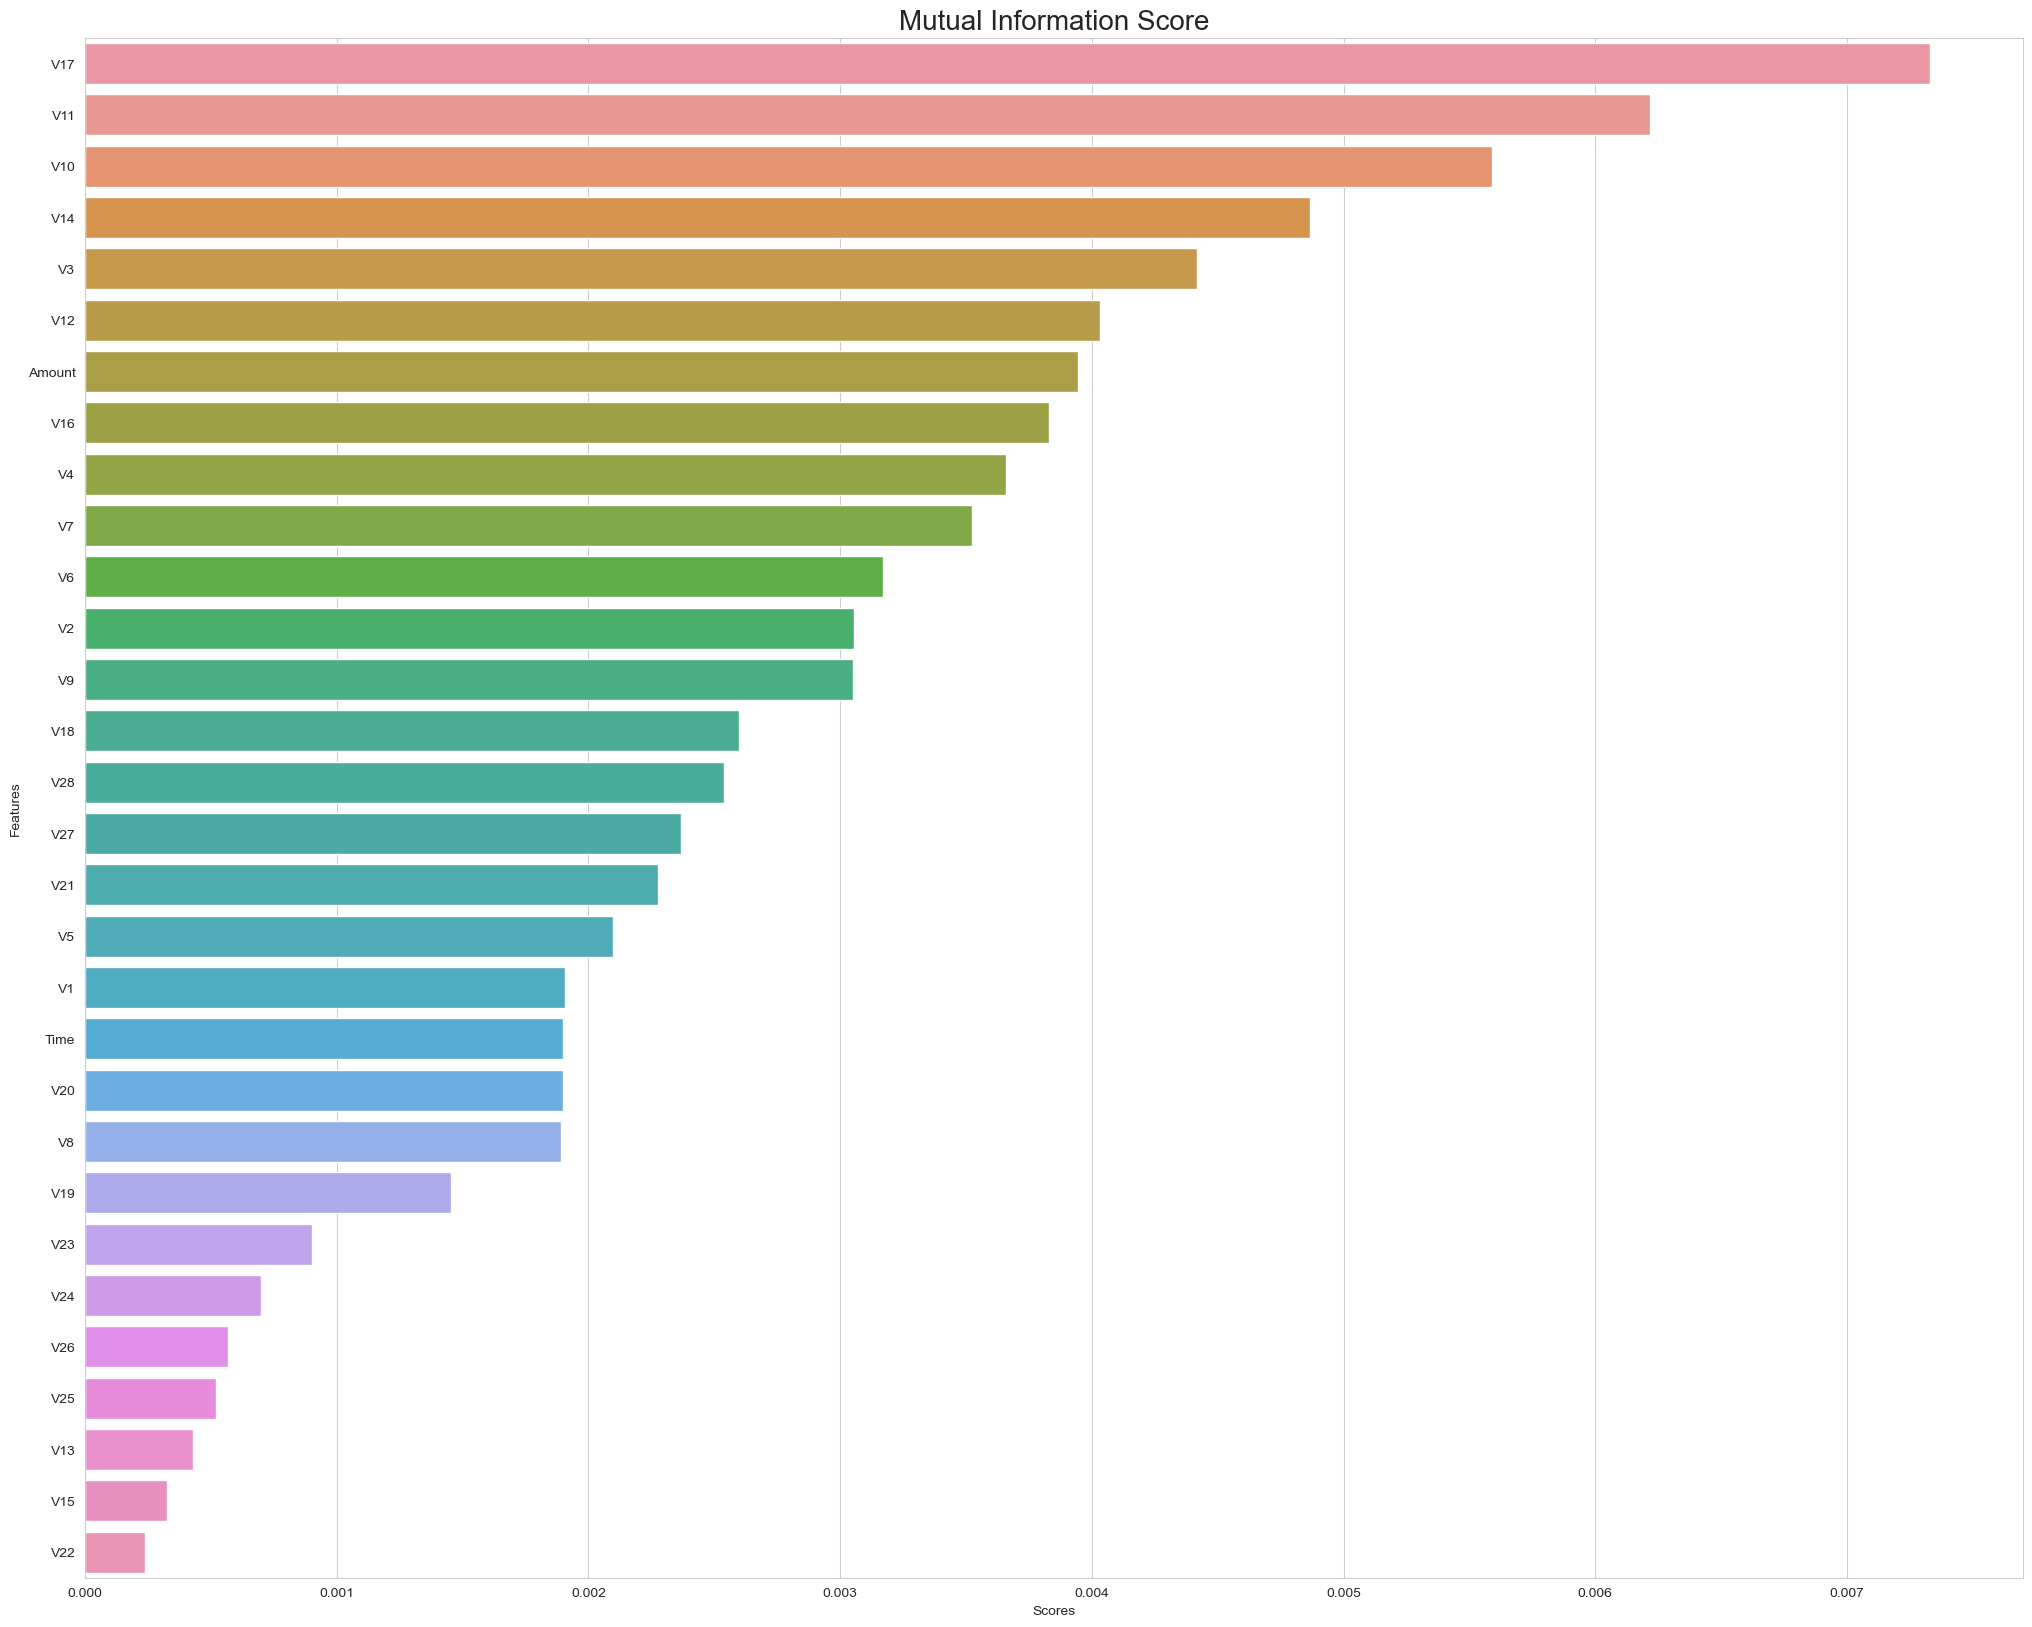

In [32]:
plt.figure(figsize=(25, 20))
sns.barplot(x="Scores", y="Features", data=mi_scores)
plt.title("Mutual Information Score", size=20)
plt.show()

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Mutual Information Score helps us to understand how much the feature variables tell us about the target variable.
Since our data have a lot of feature variables, we can take help of this to remove redundant feature variables. This may improve the proformance of our model.
</ul>
</div>

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="V"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#962E2A;
            overflow:hidden;
            font-weight:700">V <span style='color:#CDA63A'>|</span>MODEL ENGINEERING 🤖</div>

In [73]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, matthews_corrcoef, average_precision_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score, accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn import datasets, metrics
from yellowbrick.classifier import ROCAUC

import keras
from keras import layers
import keras_tuner

In [ ]:
def create_measures(y,y_pred):
    # minimalna wartość dla cut offa dla takiej samej ilości badów jak występuje w próbce
    cut_off = np.sort(y_pred)[-y.sum():].min()
    y_pred_class = np.array([0 if x < cut_off else 1 for x in y_pred])
     
    d = {'f1_score': [round(f1_score(y, y_pred_class),4)],
         'P-R score': [round(average_precision_score(y, y_pred_class),4)],
         'matthews': [round(matthews_corrcoef(y, y_pred_class),4)],
         'accuracy': [round(accuracy_score(y, y_pred_class),4)],
         'recall': [round(recall_score(y, y_pred_class),4)],
         'precision': [round(precision_score(y, y_pred_class),4)],
        }
     
    return pd.DataFrame.from_dict(d)
  
def calculating_metrics(X_train, X_test, y_train, y_test, model):
    train = create_measures(y_train, model.predict_proba(X_train)[:, 1])
    test = create_measures(y_test, model.predict_proba(X_test)[:, 1])
      
    return pd.concat([train,test]).set_index([pd.Index(['TRAIN', 'TEST'])]) 

 ### <a id="V.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.1 Functional API model - Autoencoder</p>

What are Autoencoders? 
* Autoencoders are a special type of neural network architectures in which the output is same as the input. 
* Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. 
* An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). 
* These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
The goal is to create an autoencoder model in which we only show the model non-fraud cases. 
<li> We assume that frauds are anomalies in transactions.
<li> The model will try to learn the best representation of non-fraud cases (only normal transactions). The same model will be used to generate the representations of fraud cases and we expect them to be different from non-fraud ones.
<li> Aautoencoder will be created  only on normal transactions.
<li> It will be created a network with one input layer and one output layer having identical dimentions. 
</ul>
</div>

In [68]:
df = train.copy()

In [69]:
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [72]:
df_train, df_valid = train_test_split(df, test_size=0.3, random_state=42)
 
X_train_1 = df_train[df_train['Class'] == 0]
X_train_1 = X_train_1.drop(['Class'], axis=1)
 
X_valid_1 = df_valid.drop(['Class'], axis=1)
y_valid_1 = df_valid['Class'] 
 
print(f'X_train_1 shape: {X_train_1.shape};')
print(f'X_valid_1 shape: {X_valid_1.shape}; y_test shape: {y_valid_1.shape}')

X_train_1 shape: (199008, 30);
X_valid_1 shape: (85443, 30); y_test shape: (85443,)


In [73]:
# Model 1
learning_rate = 0.00001
input_dim = X_train_1.shape[1]
 
input_layer = Input(shape=(input_dim, ))
encoder = Dense(16, activation='elu', 
                activity_regularizer=regularizers.l1(learning_rate)
               )(input_layer)
encoder = Dense(8, activation='relu')(encoder)
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(input_dim, activation='elu')(decoder)
 
autoencoder1 = Model(inputs=input_layer, outputs=decoder)
 
autoencoder1.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')
 
# ModelCheck = ModelCheckpoint(filepath='autoencoder_check_point.h5', 
#                              monitor='accuracy', save_best_only=True, 
#                              verbose=1)
 
EarlyStop = EarlyStopping(monitor='accuracy', patience=15, verbose=1)
 
autoencoder1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history_1 = autoencoder1.fit(x=X_train_1, y=X_train_1, 
           epochs=50,
           verbose=1,
           batch_size = 256,
           validation_data = (X_valid_1, X_valid_1),
           callbacks = [EarlyStop]
           )

Epoch 1/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2780 - loss: 0.8901 - val_accuracy: 0.5827 - val_loss: 0.6310
Epoch 2/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5981 - loss: 0.5725 - val_accuracy: 0.6378 - val_loss: 0.5708
Epoch 3/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6450 - loss: 0.5473 - val_accuracy: 0.6613 - val_loss: 0.5445
Epoch 4/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6651 - loss: 0.5102 - val_accuracy: 0.6696 - val_loss: 0.5301
Epoch 5/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6720 - loss: 0.4927 - val_accuracy: 0.6747 - val_loss: 0.5212
Epoch 6/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6783 - loss: 0.4953 - val_accuracy: 0.6791 - val_loss: 0.5156
Epoch 7/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6801 - loss: 0.4935 - val_accuracy: 0.6796 - val_loss: 0.5114
Epoch 8/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6822 - loss: 0.4855 - val_accuracy: 0.

In [75]:
history_1.history['accuracy']

[0.43660053610801697,
 0.6106588840484619,
 0.6521145105361938,
 0.6656616926193237,
 0.6736412644386292,
 0.6785656809806824,
 0.6815856695175171,
 0.6836860775947571,
 0.6845302581787109,
 0.6847363114356995,
 0.6861633658409119,
 0.6874949932098389,
 0.688741147518158,
 0.6895903944969177,
 0.6910777688026428,
 0.6917158961296082,
 0.6917209625244141,
 0.6922184228897095,
 0.6907913088798523,
 0.690771222114563,
 0.6912837624549866,
 0.6903089284896851,
 0.68960040807724,
 0.6900777816772461,
 0.6906556487083435,
 0.6911782622337341,
 0.6909571290016174,
 0.6906808018684387,
 0.6911280155181885,
 0.6908063888549805,
 0.6911129355430603,
 0.6915400624275208,
 0.6916857361793518]

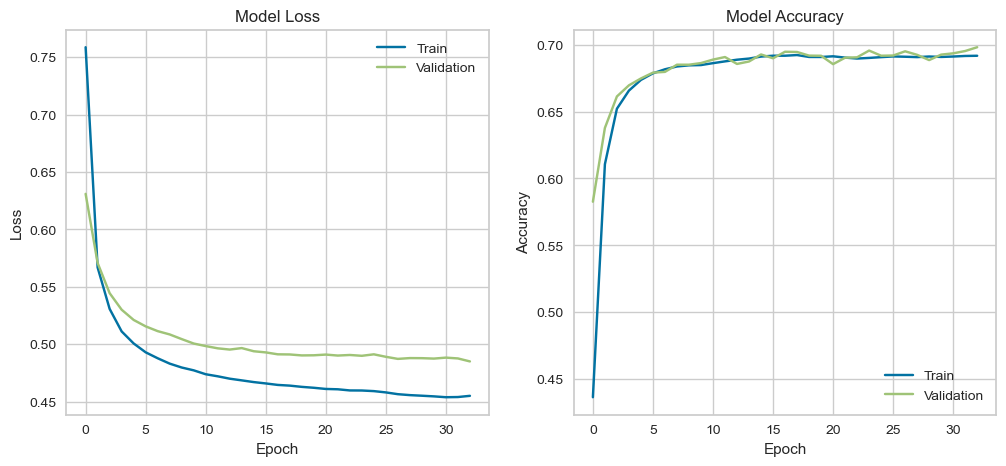

In [76]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [78]:
X_valid_pred = autoencoder1.predict(X_valid_1)
mse = np.mean(np.power(X_valid_1 - X_valid_pred, 2), axis=1)
df_error = pd.DataFrame({'Class': y_valid_1, 'reconstruction_error': mse})

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step


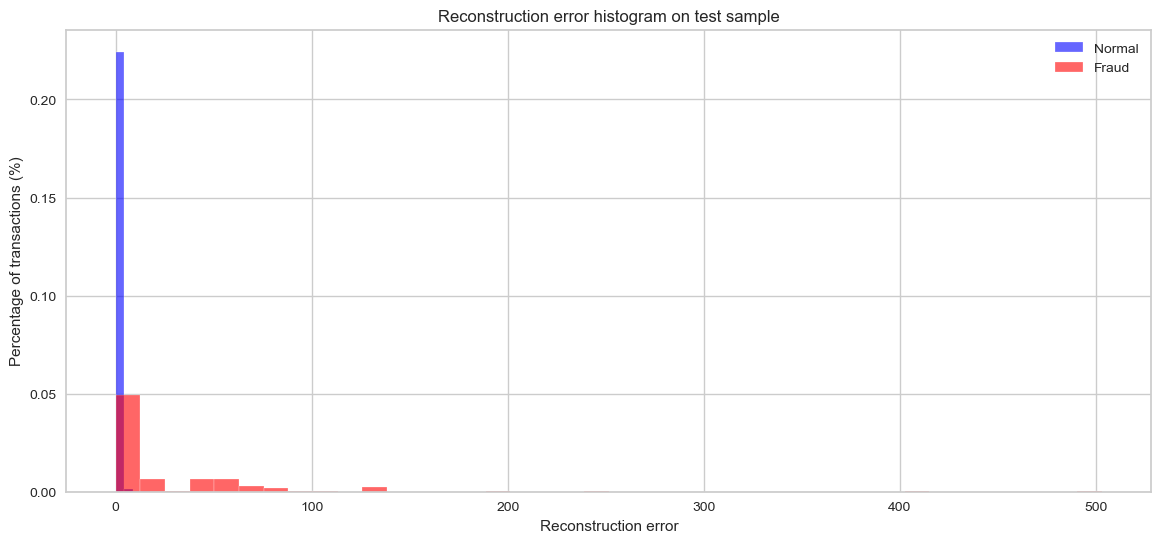

In [82]:
hist_norm_fraud(df_error[df_error['Class'] == 0]['reconstruction_error'], 
                df_error[df_error['Class'] == 1]['reconstruction_error'],
                bins=40,
                title="Reconstruction error histogram on test sample",
                xlabel="Reconstruction error",
                ylabel="Percentage of transactions (%)")

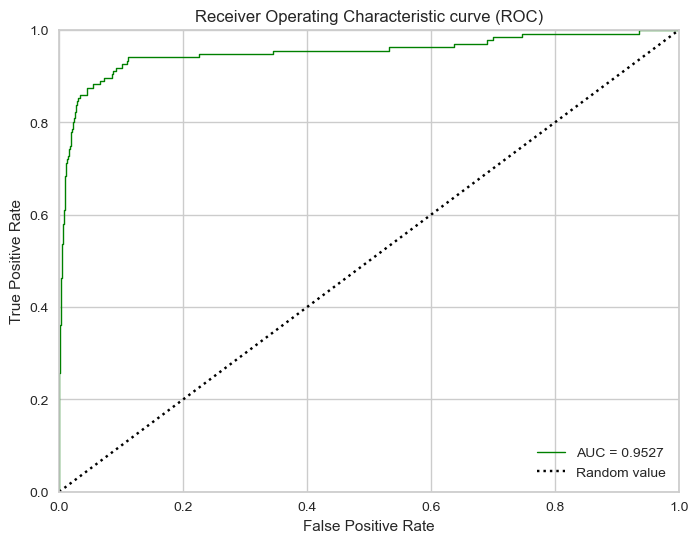

In [86]:
fpr, tpr, thresholds = roc_curve(df_error['Class'], 
                                 df_error['reconstruction_error'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=('green'), 
         label='AUC = %0.4f'% roc_auc, linewidth=1)
plt.plot([0,1],[0,1], color='black', linestyle =':', label='Random value')
plt.title('Receiver Operating Characteristic curve (ROC)')
plt.legend(loc='lower right', frameon=False)
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

 ### <a id="V.1.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.1.1 Model 11</p>

In [141]:
learning_rate = 0.00001
input_dim = X_train_1.shape[1]
 
input_layer = Input(shape=(input_dim, ))
encoder = Dense(256, activation='relu'
               )(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(128, activation='relu'
               )(encoder)
encoder = Dropout(0.1)(encoder)
encoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(encoder)
# decoder = Dropout(0.1)(decoder)
decoder = Dense(256, activation='relu')(decoder)
# decoder = Dropout(0.1)(decoder)
decoder = Dense(input_dim, activation='elu')(decoder)
 
autoencoder_11 = Model(inputs=input_layer, outputs=decoder)
 
autoencoder_11.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                    metrics=['accuracy'],
                    loss='mean_squared_error')
 
# ModelCheck = ModelCheckpoint(filepath='autoencoder_check_point.h5', 
#                              monitor='accuracy', save_best_only=True, 
#                              verbose=1)
 
EarlyStop = EarlyStopping(monitor='accuracy', patience=15, verbose=1)
 
autoencoder_11.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,142 (383.37 KB)

 Trainable params: 98,142 (383.37 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
history_11 = autoencoder_11.fit(x=X_train_1, y=X_train_1, 
           epochs=50,
           verbose=1,
           batch_size = 256,
           validation_data = (X_valid_1, X_valid_1),
           callbacks = [EarlyStop]
           )

Epoch 1/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6295 - loss: 0.4647 - val_accuracy: 0.8577 - val_loss: 0.2792
Epoch 2/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7741 - loss: 0.2931 - val_accuracy: 0.8777 - val_loss: 0.2662
Epoch 3/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7997 - loss: 0.2686 - val_accuracy: 0.8852 - val_loss: 0.2637
Epoch 4/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8118 - loss: 0.2744 - val_accuracy: 0.8832 - val_loss: 0.2604
Epoch 5/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8221 - loss: 0.2557 - val_accuracy: 0.8830 - val_loss: 0.2626
Epoch 6/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8247 - loss: 0.2768 - val_accuracy: 0.8989 - val_loss: 0.2557
Epoch 7/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8346 - loss: 0.2514 - val_accuracy: 0.9017 - val_loss: 0.2564
Epoch 8/50
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8371 - loss: 0.2610 - val_accuracy: 0.

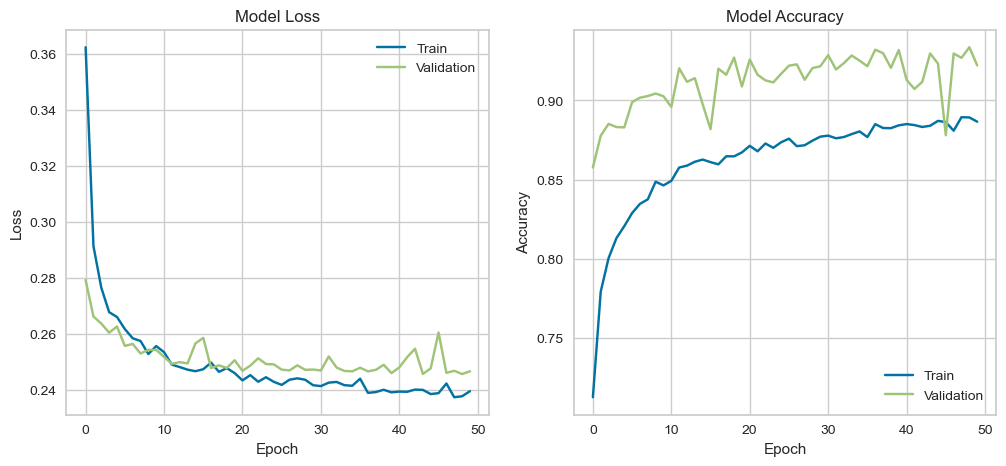

In [143]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [158]:
X_valid_pred_11 = autoencoder_11.predict(X_valid_1)
mse = np.mean(np.power(X_valid_1 - X_valid_pred_11, 2), axis=1)
df_error_11 = pd.DataFrame({'Class': y_valid_1, 'reconstruction_error': mse})

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 587us/step


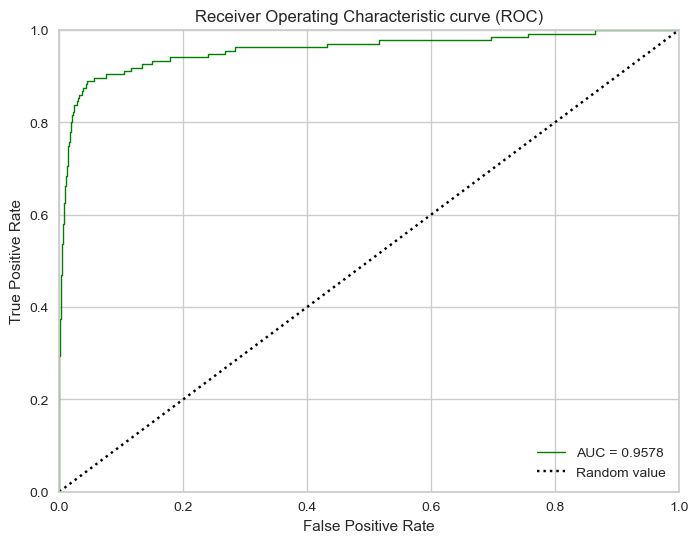

In [162]:
fpr, tpr, thresholds = roc_curve(df_error_11['Class'], 
                                 df_error_11['reconstruction_error'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=('green'), 
         label='AUC = %0.4f'% roc_auc, linewidth=1)
plt.plot([0,1],[0,1], color='black', linestyle =':', label='Random value')
plt.title('Receiver Operating Characteristic curve (ROC)')
plt.legend(loc='lower right', frameon=False)
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

 ### <a id="V.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.2 Sequencial API Model</p>

In [176]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42)

In [233]:
model_2 = tf.keras.models.Sequential([
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_2 = model_2.fit(X, y, 
                        epochs=100, 
                        verbose=2, 
                        batch_size=128,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stopping, reduce_lr])

Epoch 1/100
2226/2226 - 6s - 3ms/step - accuracy: 0.9945 - loss: 0.0223 - val_accuracy: 0.9994 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 2/100
2226/2226 - 4s - 2ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9995 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 3/100
2226/2226 - 4s - 2ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9995 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 4/100
2226/2226 - 4s - 2ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9995 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 5/100
2226/2226 - 4s - 2ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9996 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 6/100
2226/2226 - 4s - 2ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9996 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 7/100
2226/2226 - 4s - 2ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9995 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 8/100
2226/2226 - 4s - 2ms/s

In [163]:
history_2.history['accuracy']

[0.43660053610801697,
 0.6106588840484619,
 0.6521145105361938,
 0.6656616926193237,
 0.6736412644386292,
 0.6785656809806824,
 0.6815856695175171,
 0.6836860775947571,
 0.6845302581787109,
 0.6847363114356995,
 0.6861633658409119,
 0.6874949932098389,
 0.688741147518158,
 0.6895903944969177,
 0.6910777688026428,
 0.6917158961296082,
 0.6917209625244141,
 0.6922184228897095,
 0.6907913088798523,
 0.690771222114563,
 0.6912837624549866,
 0.6903089284896851,
 0.68960040807724,
 0.6900777816772461,
 0.6906556487083435,
 0.6911782622337341,
 0.6909571290016174,
 0.6906808018684387,
 0.6911280155181885,
 0.6908063888549805,
 0.6911129355430603,
 0.6915400624275208,
 0.6916857361793518]

In [234]:
history_2.history['val_accuracy']

[0.9994148015975952,
 0.9995084404945374,
 0.9994850158691406,
 0.9994967579841614,
 0.9995786547660828,
 0.999555230140686,
 0.9995318651199341,
 0.9994733333587646,
 0.9995903968811035,
 0.9995903968811035,
 0.9995084404945374,
 0.999555230140686,
 0.9996137619018555,
 0.9996020793914795,
 0.999555230140686,
 0.9996255040168762,
 0.9996722936630249,
 0.9995786547660828,
 0.9997074007987976,
 0.9996255040168762,
 0.9997190833091736,
 0.9996371865272522,
 0.9996371865272522,
 0.9997190833091736,
 0.9996255040168762,
 0.9997308254241943,
 0.999777615070343,
 0.999765932559967,
 0.9997893571853638,
 0.999765932559967,
 0.999765932559967,
 0.999777615070343,
 0.9998127222061157,
 0.9997893571853638,
 0.999777615070343,
 0.9997893571853638,
 0.999777615070343,
 0.9998010396957397,
 0.9998010396957397,
 0.9998010396957397,
 0.9998010396957397,
 0.9998127222061157,
 0.9998127222061157,
 0.9998244643211365,
 0.9998127222061157,
 0.9998127222061157,
 0.9998244643211365,
 0.9998244643211365,
 0

In [164]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,069 (199.49 KB)

 Trainable params: 51,069 (199.49 KB)

 Non-trainable params: 0 (0.00 B)

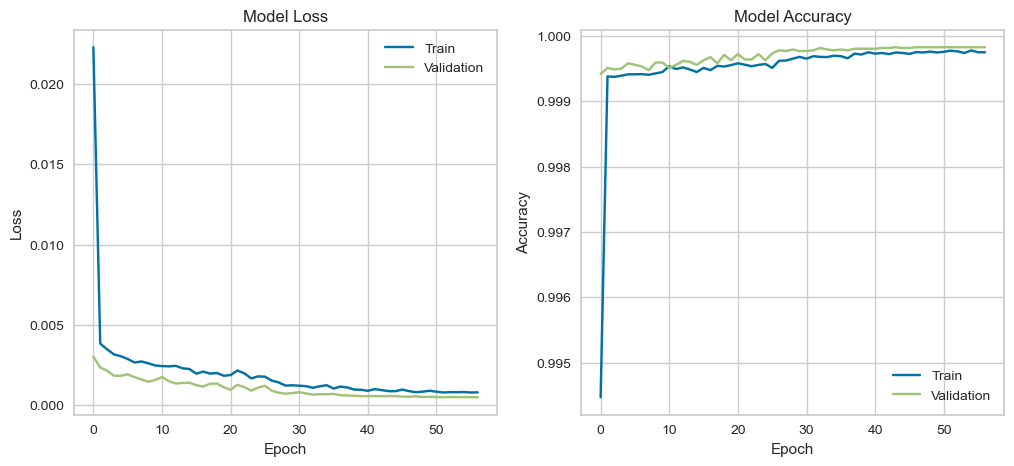

In [237]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()

In [239]:
X_test_pred_2 = model_2.predict(X_valid)
mse_2 = np.mean(np.power(X_valid - X_test_pred_2, 2), axis=1)
df_error_2 = pd.DataFrame({'Class': y_valid, 'reconstruction_error': mse_2})

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step


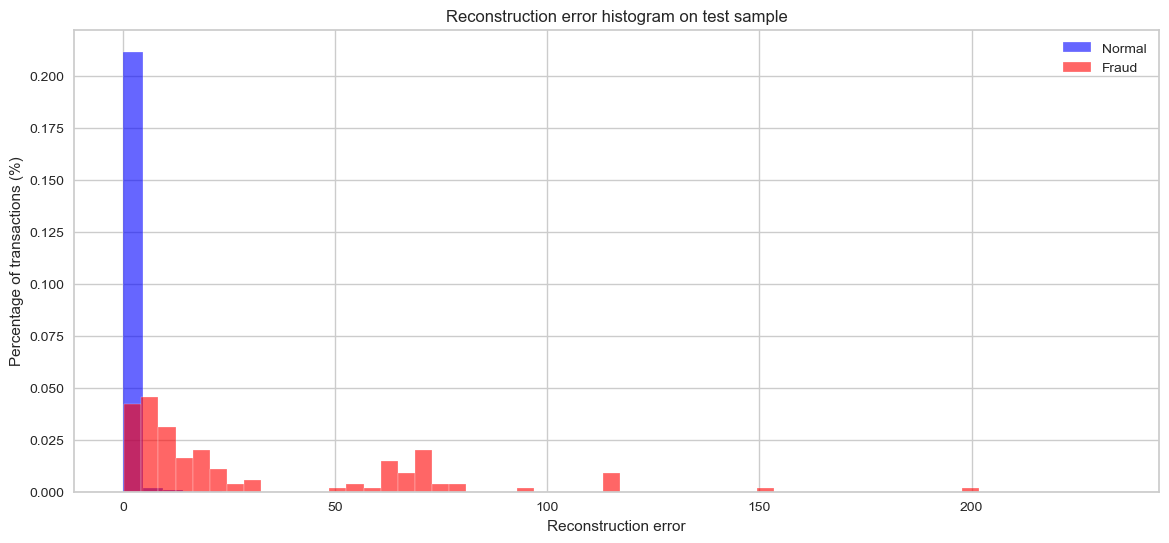

In [240]:
hist_norm_fraud(df_error_2[df_error_2['Class'] == 0]['reconstruction_error'], 
                df_error_2[df_error_2['Class'] == 1]['reconstruction_error'],
                bins=50,
                title="Reconstruction error histogram on test sample",
                xlabel="Reconstruction error",
                ylabel="Percentage of transactions (%)")

<div style=" background-color:#E3867D;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
Conclusion. 
<li> The result looks very satisfactory. Most high spread trades are actually fraudulent 
</ul>
</div>

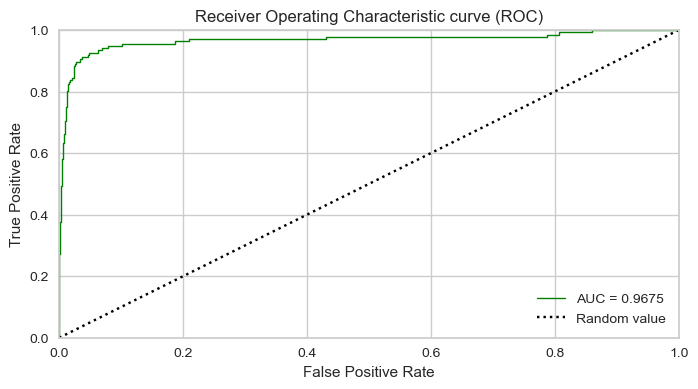

In [263]:
fpr, tpr, thresholds = roc_curve(df_error_2['Class'], 
                                 df_error_2['reconstruction_error'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='green', 
         label='AUC = %0.4f'% roc_auc, linewidth=1)
plt.plot([0,1],[0,1], color='black', linestyle =':', label='Random value')
plt.title('Receiver Operating Characteristic curve (ROC)')
plt.legend(loc='lower right', frameon=False)
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [264]:
roc_auc_score(y_valid, X_test_pred_2)

0.9999737970609957

In [ ]:
treshold=3
fig, ax = plt.subplots(figsize=(14, 8))
 
ax.plot(df_error_1[df_error_2['Class'] == 0].index, 
        df_error_1[df_error_2['Class'] == 0]['reconstruction_error'], 
        marker='o', linestyle='', color=("blue"),
        label= 'Normal')
ax.plot(df_error_1[df_error_2['Class'] == 1].index, 
        df_error_1[df_error_2['Class'] == 1]['reconstruction_error'], 
        marker='o', linestyle='', color=(198/255, 0.0, 0.0),
        label= 'Fraud')
ax.hlines(treshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="black", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for test sample")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

Assumption: based on the assumed cost of a suspicious transaction and the possibility of contact with customers - we will  truncate for reconstruction errors greater than 3.

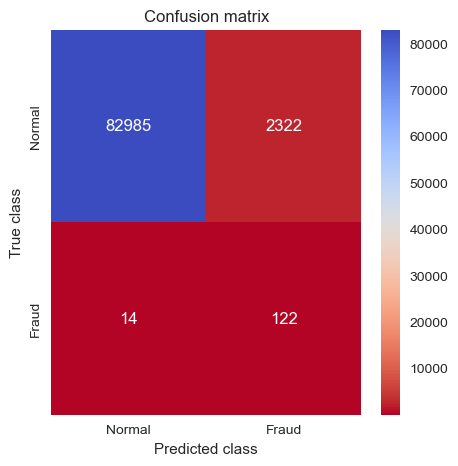

In [246]:
from sklearn.metrics import confusion_matrix
 
y_pred = [1 if e > treshold else
          0 for e in df_error_2['reconstruction_error'].values]
conf_matrix = confusion_matrix(df_error_2['Class'], y_pred)
 
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=['Normal','Fraud'], 
            yticklabels=['Normal','Fraud'], annot=True, 
            fmt="d", cmap='coolwarm_r');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

 ### <a id="V.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3 Classificators</p>

StratifiedKFold

Stratification is used when the datasets contain unbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42)

In [230]:
print(f'train_normal shape: {train_normal.shape};')
print(f'train_fraud shape: {train_fraud.shape};')
print(f'X shape: {X.shape};')
print(f'X_train shape: {X_train.shape};')
print(f'X_valid shape: {X_valid.shape}; y_valid shape: {y_valid.shape}')

train_normal shape: (284315, 31);
train_fraud shape: (492, 31);
X shape: (284807, 30);
X_train shape: (199364, 30);
X_valid shape: (85443, 30); y_valid shape: (85443,)


In [90]:
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_valid, y_valid)
    prediction = model.predict(X_valid)
    print(f"\
{model_name} - Train Score = {model_train_score *100}%\n\
{model_name} - Valid Score = {model_test_score*100}%\n\
{model_name} - Mean Squared Error = {mean_squared_error(y_valid, prediction)}\n\
{model_name} - Mean Absolute Error = {mean_absolute_error(y_valid, prediction)}")
    

def kfold_accuracy_RSKFold(model): 
    kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc_ovo')
    print('AUC: %.2f (%.2f)'% (np.mean(n_scores), np.std(n_scores)))


def kfold_accuracy(model): 
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print('Accuracy = %.3f (%.3f)'% (np.mean(n_scores), np.std(n_scores)))
    
def kfold_AUC(model):  
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc_ovo')
    print('AUC: %.2f (%.2f)'% (np.mean(n_scores), np.std(n_scores)))

 ### <a id="V.3.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3.1 RandomForestClassifier</p>

In [88]:
model_31 = RandomForestClassifier(n_jobs=1, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=42,
                             verbose=False)

In [91]:
model_train(model_31, 'RandomForestClassifier')

RandomForestClassifier - Train Score = 99.99899680985534%
RandomForestClassifier - Valid Score = 99.95903701883127%
RandomForestClassifier - Mean Squared Error = 0.0004096298116873237
RandomForestClassifier - Mean Absolute Error = 0.0004096298116873237


In [59]:
kfold_AUC(model_31)

AUC: 0.95 (0.02)


In [92]:
y_pred_31 = model_31.predict(X_valid)
print(classification_report(y_valid,y_pred_31))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.81      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



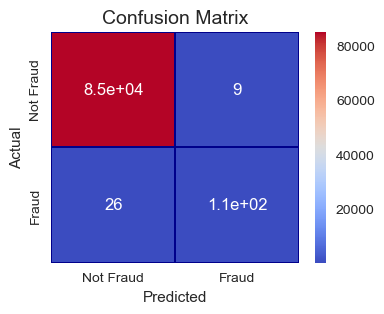

In [108]:
cm_31 = pd.crosstab(y_valid, y_pred_31, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(4,3))
sns.heatmap(cm_31, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [100]:
ROCAUCscore = roc_auc_score(y_valid, y_pred_31)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.8826


In [107]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}
grid_rfb = RandomizedSearchCV(clf, param_grid=params, cv=5, 
                          scoring='recall').fit(X_train, y_train)

TypeError: RandomizedSearchCV.__init__() got an unexpected keyword argument 'param_grid'

In [111]:
def plot_auc_roc_curve(y_valid, y_pred):
    fpr, tpr, _ = roc_curve(y_valid, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
# plot_auc_roc_curve(y_valid, y_pred[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_valid, y_pred_31)

NameError: name 'plot_sklearn_roc_curve' is not defined

In [114]:
metrics.plot_roc_curve(model_31, X_valid, y_valid) 
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

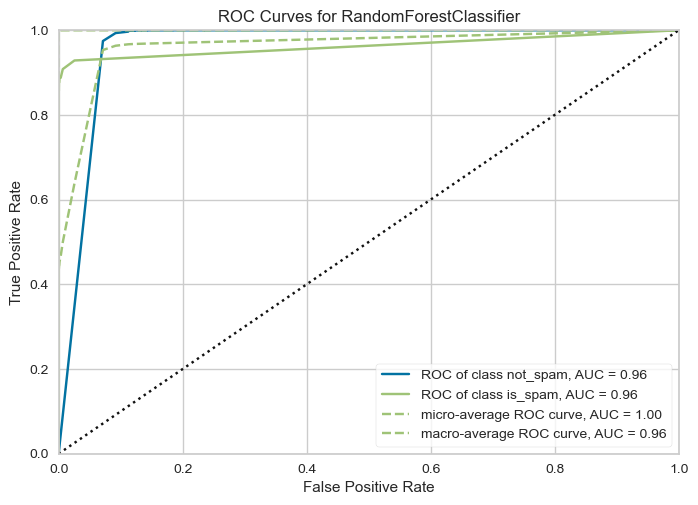

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [116]:
visualizer = ROCAUC(model_31, classes=["not_spam", "is_spam"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer.show()     

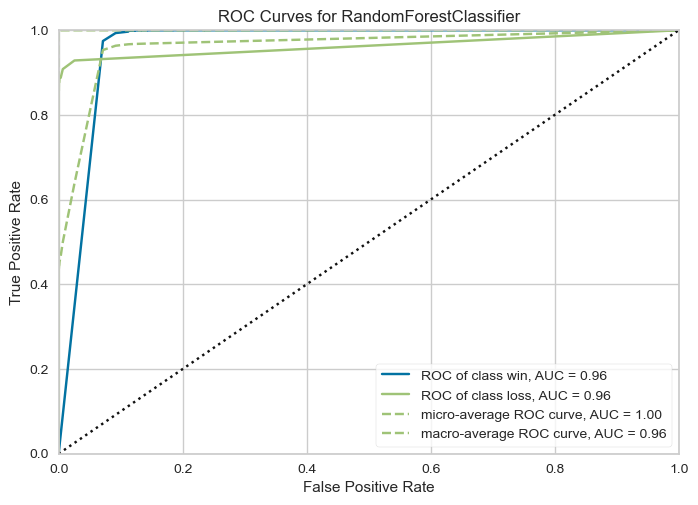

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [117]:
visualizer = ROCAUC(model_31, classes=["win", "loss", "draw"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer.show()  


 ### <a id="V.3.2"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3.2 XGBoostClassifier</p>

In [110]:
model_32 = XGBClassifier(random_state= 42)

In [111]:
model_train(model_32, 'XGBClassifier')

XGBClassifier - Train Score = 100.0%
XGBClassifier - Valid Score = 99.96137776061234%
XGBClassifier - Mean Squared Error = 0.0003862223938766195
XGBClassifier - Mean Absolute Error = 0.0003862223938766195


In [267]:
kfold_accuracy_RSKFold(model_32)

AUC: 0.98 (0.01)


In [112]:
y_pred_32 = model_32.predict(X_valid)

In [269]:
roc_auc_score(y_valid.values, y_pred_32)

0.9080413458243203

In [270]:
print(classification_report(y_valid,y_pred_32))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



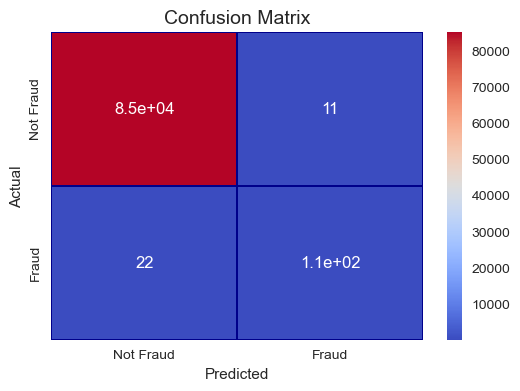

In [114]:
cm_32 = pd.crosstab(y_valid.values, y_pred_32, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,4))
sns.heatmap(cm_32, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

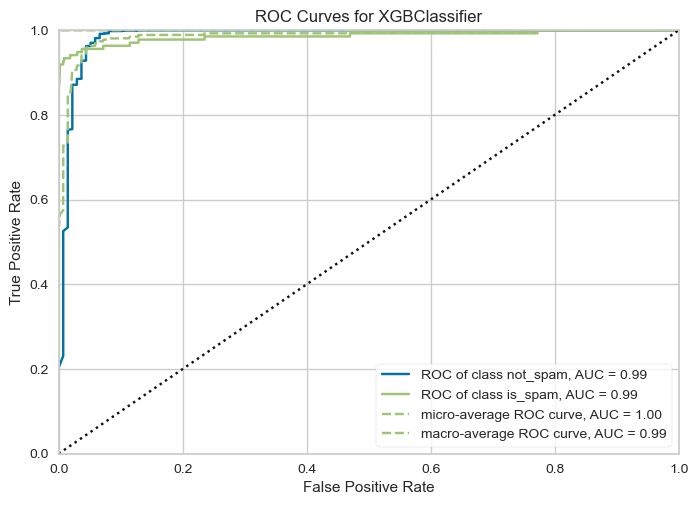

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [273]:
visualizer = ROCAUC(model_32, classes=["not_spam", "is_spam"])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer.show()     

 ### <a id="V.3.3"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.3.3 LGBMClassifier</p>

In [116]:
model_33 = LGBMClassifier(random_state= 42)

In [117]:
model_train(model_33, 'LGBMClassifier')

[LightGBM] [Info] Number of positive: 356, number of negative: 199008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001786 -> initscore=-6.326170
[LightGBM] [Info] Start training from score -6.326170
LGBMClassifier - Train Score = 99.81140025280392%
LGBMClassifier - Valid Score = 99.75071100031599%
LGBMClassifier - Mean Squared Error = 0.0024928899968399984
LGBMClassifier - Mean Absolute Error = 0.0024928899968399984


In [277]:
kfold_accuracy_RSKFold(model_33)

[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [

[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [

[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [

[LightGBM] [Info] Number of positive: 393, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360885
[LightGBM] [Info] Start training from score -6.360885
[LightGBM] [Info] Number of positive: 394, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227846, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358344
[LightGBM] [Info] Start training from score -6.358344
[LightGBM] [

In [118]:
y_pred_33 = model_33.predict(X_valid)

In [280]:
roc_auc_score(y_valid, y_pred_33)

0.7668115557029661

In [281]:
print(classification_report(y_valid,y_pred_33))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.21      0.54      0.31       136

    accuracy                           1.00     85443
   macro avg       0.61      0.77      0.65     85443
weighted avg       1.00      1.00      1.00     85443



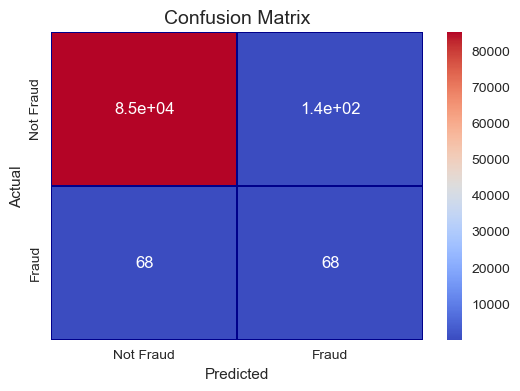

In [119]:
cm_33 = pd.crosstab(y_valid.values, y_pred_33, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,4))
sns.heatmap(cm_33, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

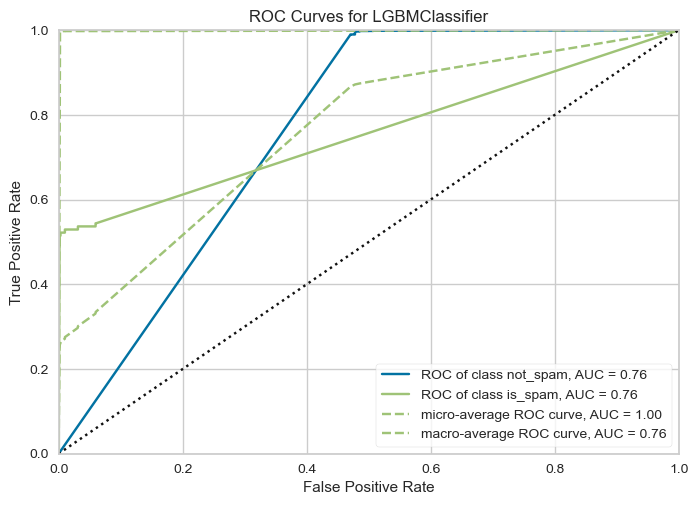

<Axes: title={'center': 'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [120]:
visualizer_33 = ROCAUC(model_33, classes=["not_spam", "is_spam"])
visualizer_33.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_33.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_33.show()  

 ### <a id="V.4"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4 SMOTE Classifiers</p>

In [82]:
def model_train_smote(model,model_name):
    model.fit(X_train_smote,y_train_smote)
    model_train_score = model.score(X_train_smote, y_train_smote)
    model_test_score = model.score(X_valid, y_valid)
    prediction = model.predict(X_valid)
    print(f"\
{model_name} - Train Score = {model_train_score *100}%\n\
{model_name} - Valid Score = {model_test_score*100}%\n\
{model_name} - Mean Squared Error = {mean_squared_error(y_valid, prediction)}\n\
{model_name} - Mean Absolute Error = {mean_absolute_error(y_valid, prediction)}")
       
def kfold_AUC_smote(model): 
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    n_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=kf, scoring='roc_auc_ovo')
    print('AUC = %.2f (%.2f)'% (np.mean(n_scores), np.std(n_scores)))

 ### <a id="V.4.1"><p style="background-color: #962E2A;color:white;display: inline-block;padding:.6rem;border-radius:.5rem">V.4.1 RandomForestClassifier - SMOTE</p>

In [124]:
model_41 = RandomForestClassifier(n_jobs=1, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=42,
                             verbose=False)

In [125]:
model_train_smote(model_41, 'RandomForestClassifier')

RandomForestClassifier - Train Score = 99.99974875381893%
RandomForestClassifier - Valid Score = 99.95903701883127%
RandomForestClassifier - Mean Squared Error = 0.0004096298116873237
RandomForestClassifier - Mean Absolute Error = 0.0004096298116873237


In [83]:
kfold_AUC_smote(model_41)

Accuracy = 1.000 (0.000)


In [126]:
y_pred_41 = model_41.predict(X_valid)
print(classification_report(y_valid,y_pred_41))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.85      0.87       136

    accuracy                           1.00     85443
   macro avg       0.94      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



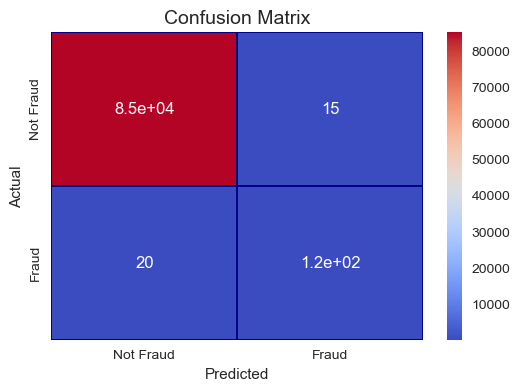

In [127]:
cm_41 = pd.crosstab(y_valid.values, y_pred_41, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,4))
sns.heatmap(cm_41, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="coolwarm")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

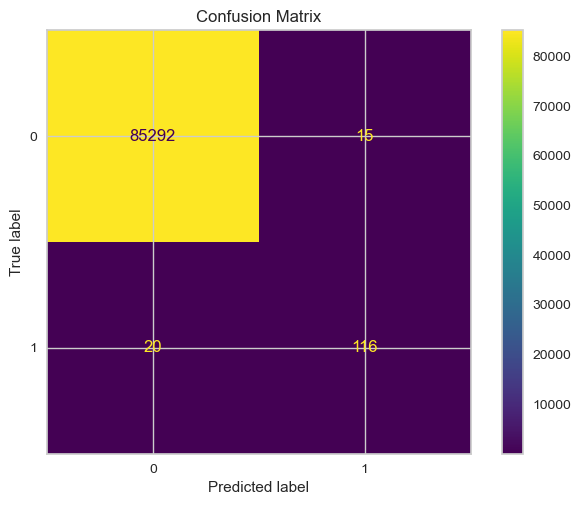

In [128]:
confusion_mat_41 = confusion_matrix(y_valid, y_pred_41)
ConfusionMatrixDisplay(confusion_mat_41).plot()
plt.title("Confusion Matrix")
plt.show()

In [86]:
ROCAUCscore_41 = roc_auc_score(y_valid, y_pred_41)
print(f"AUC-ROC Curve for Random Forest with Class weights: {ROCAUCscore_41:.4f}")

AUC-ROC Curve for Random Forest with Class weights: 0.9264


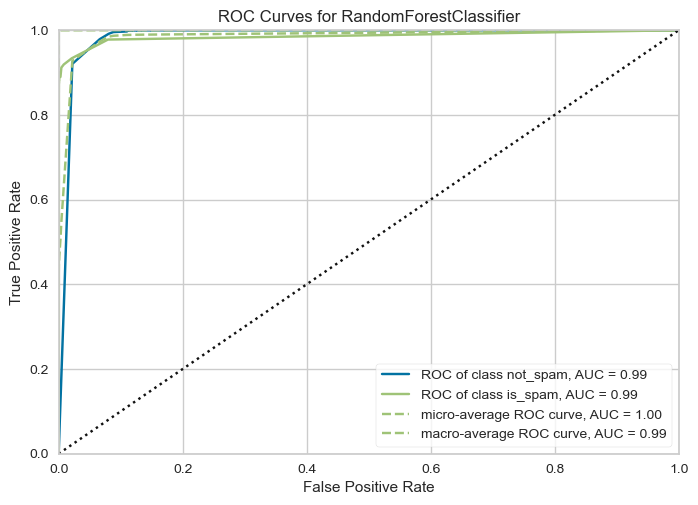

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [87]:
visualizer_41 = ROCAUC(model_41, classes=["not_spam", "is_spam"])
visualizer_41.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer_41.score(X_valid, y_valid)        # Evaluate the model on the test data
visualizer_41.show() 

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="VI"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#962E2A;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> CONCLUSION</div>

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It was investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. 

Models was split into 4 parts. 
* V.1 Functional API model
* V.2 Sequencial API Model
* V.3 Classificators
    * V.3.1 RandomForestClassifier
    * V.3.2 XGBoostClassifier
    * V.3.3 LGBMClassifier
* V.4 SMOTE Classifierss
    *V.4.1 RandomForestClassifier - SMOTE

V.1 First  model it is a Autoencoder -special type of neural network architectures in which the output is same as the input. The goal was to create an autoencoder model in which we only show the non-fraud cases (we assume that frauds are anomalies in transactions). This model will try to learn the best representation of non-fraud cases (only normal transactions).
AUC = 95%

V.2 Sequencial API Model. In this section was  develop the neural network based on  sequentional model. The Sequential model is a linear stack of layers and is used when the data flows sequentially from one layer to another.
AUC = 97%

V.3 Series of traditional classification models: 
    * V.3.1 RandomForestClassifier: AUC =  95%
    * V.3.2 XGBoostClassifier: AUC = 98%
    * V.3.3 LGBMClassifier: AUC = 76%

V.4 RandomForestClassifier model based on oversampled data by SMOTE algorithm.
AUC = 99%


We started with Autoencoder, based only on the non-fraud cases for which we obtained an AUC scode of 0.95%.
We followed with an Sequencial API Model , with higher AUC score (0.97%).
Then followed with an RandomForestClassifier, with the AUC score  0.95%.
We then experimented with a XGBoostClassifier model. In this case, was used the validation set for validation of the training model. The best validation score obtained was 0.987. 

At the end was tested RandomForestClassifier model based on oversampled data by SMOTE algorithm for which we obtained an AUC scode of 0.99%.